In [1]:
import pandas as pd
df_JS_used_full_short_01 = pd.read_json("D:/Data/ABO_riveter_result/df_JS_used_full_short_processed.json")
df_JS_used_full_short_01.head(10)

,story_id,relationships,published,genre,story_content,james_power_score,steve_power_score,james_list,steve_list
0,10293062,"James ""Bucky"" Barnes/Steve Rogers, James ""Rhod...",2017-03-14,"[Age Difference, Alpha/Alpha, Alpha/Beta/Omega...",1. Introduction\n\nI HATE BEING AN OMEGA.\n\nI...,-0.413889,1.000000,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...
1,10345806,"Bruce Banner/Tony Stark, Clint Barton/Phil Cou...",2017-03-18,"[A/B/O Universe, Alpha Bruce Banner, Alpha Phi...",1. Ice Filled Him\n\nI know it is probably a h...,0.000000,0.099353,{},defaultdict(<function default_dict_int at 0x00...
2,10479087,"James ""Bucky"" Barnes/Steve Rogers",2017-03-28,"[Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...","Three's a crowd\n\n""Morning, my love."" Bucky a...",-0.380000,0.440000,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...
3,10492905,"James ""Bucky"" Barnes/Darcy Lewis/Steve Rogers,...",2017-03-29,"[Alpha Darcy Lewis, Alpha/Beta/Omega Dynamics,...",Mornings in Brooklyn\n\nAuthor's Note:\n\nFor ...,0.548600,0.258361,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...
4,1053836,"James ""Bucky"" Barnes/Steve Rogers",2013-11-23,"[Alpha/Beta/Omega Dynamics, M/M, Pre-Serum Ste...",Cum cantibus in choro\n\nAuthor's Note:\n\nFor...,0.279301,0.014804,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...
5,10729701,"James ""Bucky"" Barnes/Steve Rogers",2017-04-25,"[Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...",1. Bucky and Steve\n\nAuthor's Note:\n\nThis i...,0.050001,0.087356,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...
6,10753200,"James ""Bucky"" Barnes & Natasha Romanov, James ...",2017-04-28,"[Alpha Bucky Barnes, Alpha Natasha Romanov, Al...",1. Chapter 1\n\nAuthor's Note:\n\nInspired by\...,0.283301,0.000000,defaultdict(<function default_dict_int at 0x00...,{}
7,10776675,"James ""Bucky"" Barnes/Steve Rogers",2017-05-01,"[Alpha Bucky Barnes, Alpha/Beta/Omega Dynamics...",1. The Soldier Rests\n\nAuthor's Note:\n\nProm...,0.252476,0.030684,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...
8,10981617,"James ""Bucky"" Barnes/Steve Rogers",2017-05-23,"[Alpha Steve, Alpha/Beta/Omega Dynamics, Alter...",Heat Wave\n\nAuthor's Note:\n\nSooooo I had or...,0.067857,0.161514,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...
9,10990134,"James ""Bucky"" Barnes & Rocket Raccoon, James ""...",2017-05-24,"[Alpha Bucky Barnes, Alpha Wade, Alpha/Beta/Om...",High School Sucks\n\nAuthor's Note:\n\nI am ho...,0.148065,0.267341,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...


In [2]:
len(df_JS_used_full_short_01)

565

In [3]:
# Check how many rows have 'james_power_score' equal to 0 or 1
james_0_1_count = df_JS_used_full_short_01[df_JS_used_full_short_01['james_power_score'].isin([0, 1, -1])].shape[0]

# Check how many rows have 'steve_power_score' equal to 0 or 1
steve_0_1_count = df_JS_used_full_short_01[df_JS_used_full_short_01['steve_power_score'].isin([0, 1, -1])].shape[0]

print("Number of rows with james_power_score equal to 0 or 1:", james_0_1_count)
print("Number of rows with steve_power_score equal to 0 or 1:", steve_0_1_count)


Number of rows with james_power_score equal to 0 or 1: 63
Number of rows with steve_power_score equal to 0 or 1: 32


In [4]:
df_JS_used_full_short_01_cleaned = df_JS_used_full_short_01[
    ~((df_JS_used_full_short_01['james_power_score'].isin([0, 1, -1])) | 
      (df_JS_used_full_short_01['steve_power_score'].isin([0, 1, -1])))
]

df_JS_used_full_short_01_cleaned.reset_index(drop=True, inplace=True)

len(df_JS_used_full_short_01_cleaned)

487

In [5]:
##Check the alpha and omega character
df_JS_used_full_short_01_cleaned['Alpha Steve Rogers'] = 0
df_JS_used_full_short_01_cleaned['Beta Steve Rogers'] = 0
df_JS_used_full_short_01_cleaned['Omega Steve Rogers'] = 0
df_JS_used_full_short_01_cleaned['Alpha Bucky Barnes'] = 0
df_JS_used_full_short_01_cleaned['Beta Bucky Barnes'] = 0
df_JS_used_full_short_01_cleaned['Omega Bucky Barnes'] = 0


alpha_steve_keywords = [x.lower() for x in ['Alpha Steve Rogers', 'Alpha!Steve Rogers', 'Alpha Steve', 'Alpha!Steve', 'Alpha Rogers']]
beta_steve_keywords = [x.lower() for x in ['Beta Steve Rogers', 'Beta!Steve Rogers', 'Beta Steve', 'Beta!Steve', 'Beta Rogers']]
omega_steve_keywords = [x.lower() for x in ['Omega Steve Rogers', 'Omega!Steve Rogers', 'Omega Steve', 'Omega!Steve', 'Omega Rogers']]
alpha_bucky_keywords = [x.lower() for x in ['Alpha Bucky Barnes', 'Alpha!Bucky Barnes', 'Alpha Bucky', 'Alpha!Bucky', 'Alpha Barnes']]
beta_bucky_keywords = [x.lower() for x in ['Beta Bucky Barnes', 'Beta!Bucky Barnes', 'Beta Bucky', 'Beta!Bucky', 'Beta Barnes']]
omega_bucky_keywords = [x.lower() for x in ['Omega Bucky Barnes', 'Omega!Bucky Barnes', 'Omega Bucky', 'Omega!Bucky', 'Omega Barnes']]


for index, row in df_JS_used_full_short_01_cleaned.iterrows():
    genre_list = row['genre']  
    genre_string = ' '.join(genre_list).lower()  # Converts the list to a string and to lowercase
    if any(keyword in genre_string for keyword in alpha_steve_keywords):
        df_JS_used_full_short_01_cleaned.at[index, 'Alpha Steve Rogers'] = 1
    if any(keyword in genre_string for keyword in beta_steve_keywords):
        df_JS_used_full_short_01_cleaned.at[index, 'Beta Steve Rogers'] = 1
    if any(keyword in genre_string for keyword in omega_steve_keywords):
        df_JS_used_full_short_01_cleaned.at[index, 'Omega Steve Rogers'] = 1
    if any(keyword in genre_string for keyword in alpha_bucky_keywords):
        df_JS_used_full_short_01_cleaned.at[index, 'Alpha Bucky Barnes'] = 1
    if any(keyword in genre_string for keyword in beta_bucky_keywords):
        df_JS_used_full_short_01_cleaned.at[index, 'Beta Bucky Barnes'] = 1
    if any(keyword in genre_string for keyword in omega_bucky_keywords):
        df_JS_used_full_short_01_cleaned.at[index, 'Omega Bucky Barnes'] = 1


selected_columns = [
    'story_id', 
    'genre', 
    'Alpha Steve Rogers', 
    'Beta Steve Rogers', 
    'Omega Steve Rogers', 
    'Alpha Bucky Barnes', 
    'Beta Bucky Barnes', 
    'Omega Bucky Barnes'
]
df_checkABO_JS = df_JS_used_full_short_01_cleaned[selected_columns]

print(df_checkABO_JS.head())


   story_id                                              genre  \
0  10479087  [Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...   
1  10492905  [Alpha Darcy Lewis, Alpha/Beta/Omega Dynamics,...   
2   1053836  [Alpha/Beta/Omega Dynamics, M/M, Pre-Serum Ste...   
3  10729701  [Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...   
4  10776675  [Alpha Bucky Barnes, Alpha/Beta/Omega Dynamics...   

   Alpha Steve Rogers  Beta Steve Rogers  Omega Steve Rogers  \
0                   1                  0                   0   
1                   0                  0                   1   
2                   0                  0                   0   
3                   1                  0                   0   
4                   0                  0                   1   

   Alpha Bucky Barnes  Beta Bucky Barnes  Omega Bucky Barnes  
0                   0                  0                   1  
1                   0                  1                   0  
2                   0        

C:\Users\yang9\AppData\Local\Temp\ipykernel_26140\2135810616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JS_used_full_short_01_cleaned['Alpha Steve Rogers'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_26140\2135810616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JS_used_full_short_01_cleaned['Beta Steve Rogers'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_26140\2135810616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [6]:
##identify S/J shipping
SJ_id = df_checkABO_JS[(df_checkABO_JS['Alpha Steve Rogers'] == 1) & (df_checkABO_JS['Omega Bucky Barnes'] == 1)]

df_JS_used_full_short_01_cleaned['SJ'] = 0

# Mark SJ column 1 in df_JS_used_full_short_01_cleaned according to story_id in SJ_id
df_JS_used_full_short_01_cleaned.loc[df_JS_used_full_short_01_cleaned['story_id'].isin(SJ_id['story_id']), 'SJ'] = 1

##identify J/S shipping
JS_id = df_checkABO_JS[(df_checkABO_JS['Alpha Bucky Barnes'] == 1) & (df_checkABO_JS['Omega Steve Rogers'] == 1)]

df_JS_used_full_short_01_cleaned['JS'] = 0


df_JS_used_full_short_01_cleaned.loc[df_JS_used_full_short_01_cleaned['story_id'].isin(JS_id['story_id']), 'JS'] = 1


df_JS_used_full_short_01_cleaned.head()

C:\Users\yang9\AppData\Local\Temp\ipykernel_26140\139129495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JS_used_full_short_01_cleaned['SJ'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_26140\139129495.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JS_used_full_short_01_cleaned['JS'] = 0


,story_id,relationships,published,genre,story_content,james_power_score,steve_power_score,james_list,steve_list,Alpha Steve Rogers,Beta Steve Rogers,Omega Steve Rogers,Alpha Bucky Barnes,Beta Bucky Barnes,Omega Bucky Barnes,SJ,JS
0,10479087,"James ""Bucky"" Barnes/Steve Rogers",2017-03-28,"[Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...","Three's a crowd\n\n""Morning, my love."" Bucky a...",-0.380000,0.440000,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,1,0,0,0,0,1,1,0
1,10492905,"James ""Bucky"" Barnes/Darcy Lewis/Steve Rogers,...",2017-03-29,"[Alpha Darcy Lewis, Alpha/Beta/Omega Dynamics,...",Mornings in Brooklyn\n\nAuthor's Note:\n\nFor ...,0.548600,0.258361,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,0,0,1,0,1,0,0,0
2,1053836,"James ""Bucky"" Barnes/Steve Rogers",2013-11-23,"[Alpha/Beta/Omega Dynamics, M/M, Pre-Serum Ste...",Cum cantibus in choro\n\nAuthor's Note:\n\nFor...,0.279301,0.014804,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,0,0,0,0,0,0,0,0
3,10729701,"James ""Bucky"" Barnes/Steve Rogers",2017-04-25,"[Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...",1. Bucky and Steve\n\nAuthor's Note:\n\nThis i...,0.050001,0.087356,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,1,0,0,0,0,1,1,0
4,10776675,"James ""Bucky"" Barnes/Steve Rogers",2017-05-01,"[Alpha Bucky Barnes, Alpha/Beta/Omega Dynamics...",1. The Soldier Rests\n\nAuthor's Note:\n\nProm...,0.252476,0.030684,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,0,0,1,1,0,0,0,1


In [7]:
len(SJ_id)

140

In [8]:
len(JS_id)

144

In [9]:
# Select SJ and JS columns to have a column of non-0 rows to form a new df named AO_JS_SJ
AO_JS_SJ = df_JS_used_full_short_01_cleaned[(df_JS_used_full_short_01_cleaned['SJ'] == 1) | (df_JS_used_full_short_01_cleaned['JS'] == 1)]

#compute gender power difference
AO_JS_SJ['gender_power_difference'] = 0

for index, row in AO_JS_SJ.iterrows():
    if row['JS'] == 1:
        AO_JS_SJ.at[index, 'gender_power_difference'] = row['james_power_score'] - row['steve_power_score']
    elif row['SJ'] == 1:
        AO_JS_SJ.at[index, 'gender_power_difference'] = row['steve_power_score'] - row['james_power_score']

AO_JS_SJ['published'] = pd.to_datetime(AO_JS_SJ['published'])

len(AO_JS_SJ)


C:\Users\yang9\AppData\Local\Temp\ipykernel_26140\1765098611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_JS_SJ['gender_power_difference'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_26140\1765098611.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8200000000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  AO_JS_SJ.at[index, 'gender_power_difference'] = row['steve_power_score'] - row['james_power_score']
C:\Users\yang9\AppData\Local\Temp\ipykernel_26140\1765098611.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

284

In [10]:
summary_stats = AO_JS_SJ['gender_power_difference'].describe()
print(summary_stats)

count    284.000000
mean       0.078453
std        0.218858
min       -0.766340
25%       -0.037732
50%        0.066355
75%        0.183568
max        1.000000
Name: gender_power_difference, dtype: float64


C:\Users\yang9\AppData\Local\Temp\ipykernel_26140\2902601934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_JS_SJ['year'] = AO_JS_SJ['published'].dt.year


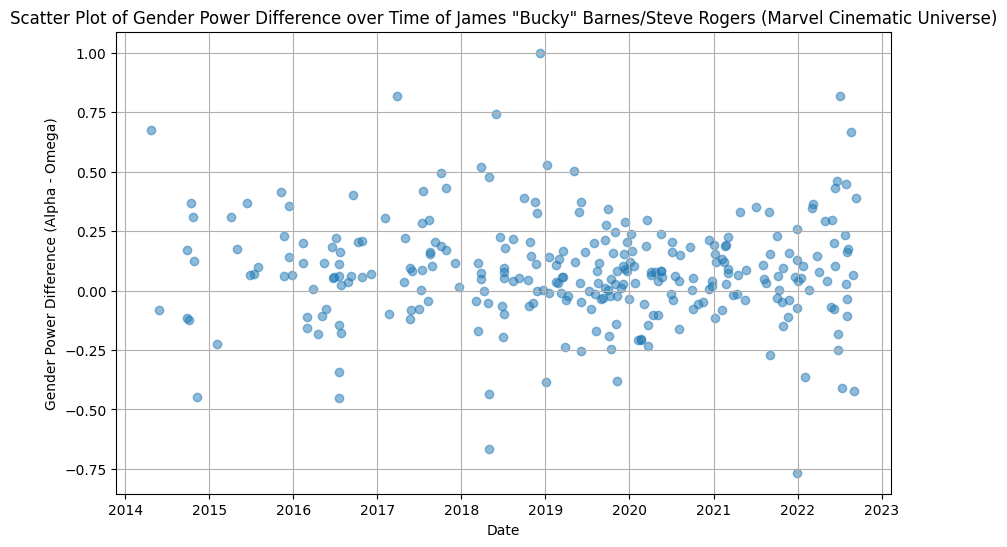

In [11]:
AO_JS_SJ['year'] = AO_JS_SJ['published'].dt.year
yearly_mean = AO_JS_SJ.groupby('year')['gender_power_difference'].mean().reset_index()

##scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(AO_JS_SJ['published'], AO_JS_SJ['gender_power_difference'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Gender Power Difference (Alpha - Omega)')
plt.title('Scatter Plot of Gender Power Difference over Time of James "Bucky" Barnes/Steve Rogers (Marvel Cinematic Universe)')
plt.grid(True)
plt.show()

In [15]:
import matplotlib.pyplot as plt
font_properties = {'family': 'serif', 'weight': 'normal', 'size': 16}
italic_properties = {'family': 'serif', 'weight': 'normal', 'size': 16, 'style': 'italic'}

D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


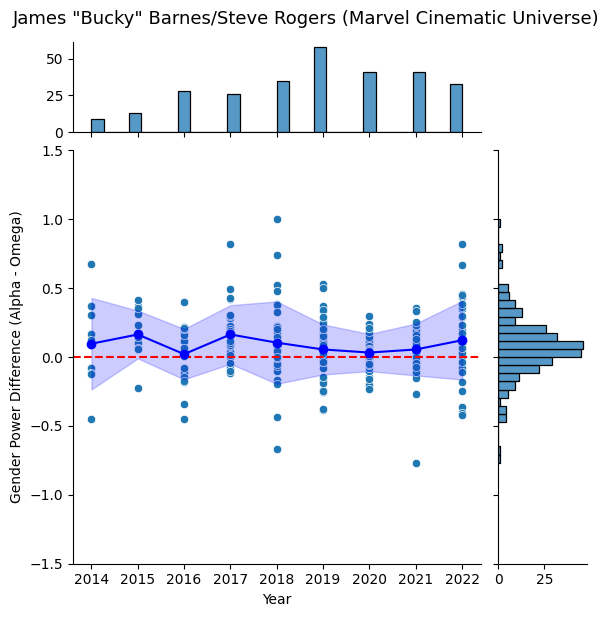

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np

yearly_stats = AO_JS_SJ.groupby('year')['gender_power_difference'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'mean_gender_power_difference', 'std_gender_power_difference']

joint_plot = sns.jointplot(data=AO_JS_SJ, x='year', y='gender_power_difference', kind='scatter', marginal_kws=dict(bins=30, fill=True), height=6, ratio=4, marginal_ticks=True)

joint_plot.ax_joint.axhline(y=0, color='r', linestyle='--')

joint_plot.ax_joint.plot(yearly_stats['year'], yearly_stats['mean_gender_power_difference'], color='b', marker='o', label='Average Gender Power Difference')
joint_plot.ax_joint.fill_between(yearly_stats['year'], 
                 yearly_stats['mean_gender_power_difference'] - yearly_stats['std_gender_power_difference'], 
                 yearly_stats['mean_gender_power_difference'] + yearly_stats['std_gender_power_difference'], 
                 color='b', alpha=0.2)

joint_plot.set_axis_labels('Year', 'Gender Power Difference (Alpha - Omega)')
joint_plot.ax_joint.set_ylim(-1.5, 1.5)
plt.suptitle(r'James "Bucky" Barnes/Steve Rogers (Marvel Cinematic Universe)', y=1.02, fontsize=13)
plt.show()

C:\Users\yang9\AppData\Local\Temp\ipykernel_11060\326263224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_JS_SJ['year'] = AO_JS_SJ['published'].dt.year


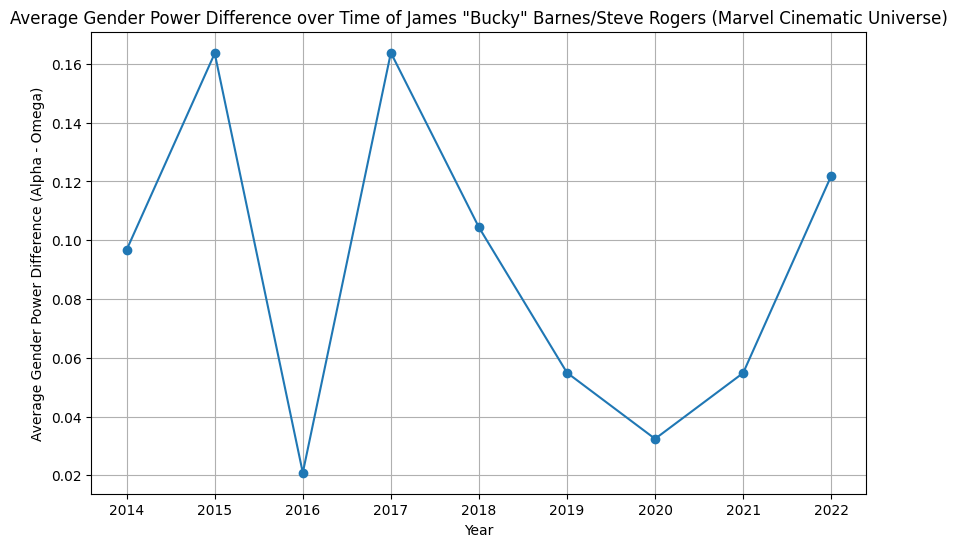

In [13]:
#line
plt.figure(figsize=(10, 6))
plt.plot(yearly_mean['year'], yearly_mean['gender_power_difference'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Gender Power Difference (Alpha - Omega)')
plt.title('Average Gender Power Difference over Time of James "Bucky" Barnes/Steve Rogers (Marvel Cinematic Universe)')
plt.grid(True)
plt.show()


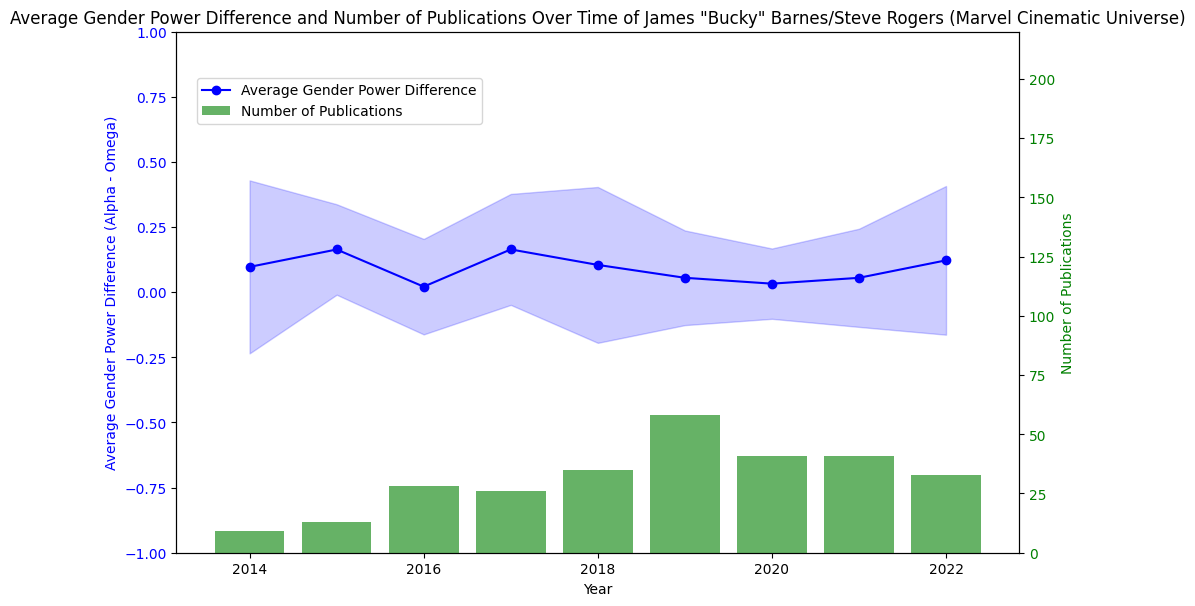

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

yearly_stats = AO_JS_SJ.groupby('year')['gender_power_difference'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'mean_gender_power_difference', 'std_gender_power_difference']

yearly_counts = AO_JS_SJ['year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['year', 'count']
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(yearly_stats['year'], yearly_stats['mean_gender_power_difference'], color='b', marker='o', label='Average Gender Power Difference')
ax1.fill_between(yearly_stats['year'], 
                 yearly_stats['mean_gender_power_difference'] - yearly_stats['std_gender_power_difference'], 
                 yearly_stats['mean_gender_power_difference'] + yearly_stats['std_gender_power_difference'], 
                 color='b', alpha=0.2)

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Gender Power Difference (Alpha - Omega)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(-1.0, 1.0)

ax2 = ax1.twinx()
ax2.bar(yearly_counts['year'], yearly_counts['count'], color='g', alpha=0.6, label='Number of Publications')
ax2.set_ylabel('Number of Publications', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylim(0, 220)


fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))


plt.title('Average Gender Power Difference and Number of Publications Over Time of James "Bucky" Barnes/Steve Rogers (Marvel Cinematic Universe)')

plt.show()

In [52]:
df_JS_used_full = pd.read_json('D:/Data/ABO_data/ABO_JS_0510.json', lines=True)
AO_JS_SJ_merged = AO_JS_SJ.merge(df_JS_used_full[['story_id', 'author']], on='story_id', how='left')

unique_authors = AO_JS_SJ_merged['author'].nunique()

total_authors = AO_JS_SJ_merged['author'].count()

unique_author_ratio = unique_authors / total_authors

print(f"Unique Author Ratio: {unique_author_ratio:.2%}")

Unique Author Ratio: 69.01%


In [67]:
AO_JS_SJ.head(5)

,story_id,relationships,published,genre,story_content,james_power_score,steve_power_score,james_list,steve_list,Alpha Steve Rogers,Beta Steve Rogers,Omega Steve Rogers,Alpha Bucky Barnes,Beta Bucky Barnes,Omega Bucky Barnes,SJ,JS,gender_power_difference,year
0,10479087,"James ""Bucky"" Barnes/Steve Rogers",2017-03-28,"[Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...","Three's a crowd\n\n""Morning, my love."" Bucky a...",-0.380000,0.440000,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,1,0,0,0,0,1,1,0,0.820000,2017
3,10729701,"James ""Bucky"" Barnes/Steve Rogers",2017-04-25,"[Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...",1. Bucky and Steve\n\nAuthor's Note:\n\nThis i...,0.050001,0.087356,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,1,0,0,0,0,1,1,0,0.037355,2017
4,10776675,"James ""Bucky"" Barnes/Steve Rogers",2017-05-01,"[Alpha Bucky Barnes, Alpha/Beta/Omega Dynamics...",1. The Soldier Rests\n\nAuthor's Note:\n\nProm...,0.252476,0.030684,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,0,0,1,1,0,0,0,1,0.221792,2017
5,10981617,"James ""Bucky"" Barnes/Steve Rogers",2017-05-23,"[Alpha Steve, Alpha/Beta/Omega Dynamics, Alter...",Heat Wave\n\nAuthor's Note:\n\nSooooo I had or...,0.067857,0.161514,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,1,0,0,0,0,1,1,0,0.093657,2017
6,10990134,"James ""Bucky"" Barnes & Rocket Raccoon, James ""...",2017-05-24,"[Alpha Bucky Barnes, Alpha Wade, Alpha/Beta/Om...",High School Sucks\n\nAuthor's Note:\n\nI am ho...,0.148065,0.267341,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,0,0,1,1,0,0,0,1,-0.119276,2017


In [81]:
##additional tags:
AO_JS_SJ_merged_1 = AO_JS_SJ_merged.merge(df_JS_used_full[['story_id', 'additional_tags']], on='story_id', how='left')
AO_JS_SJ_merged_1.drop(columns=['story_content'], inplace=True)
AO_JS_SJ_merged_1.head()

,story_id,relationships,published,genre,james_power_score,steve_power_score,james_list,steve_list,Alpha Steve Rogers,Beta Steve Rogers,Omega Steve Rogers,Alpha Bucky Barnes,Beta Bucky Barnes,Omega Bucky Barnes,SJ,JS,gender_power_difference,year,author,additional_tags
0,10479087,"James ""Bucky"" Barnes/Steve Rogers",2017-03-28,"[Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...",-0.380000,0.440000,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,1,0,0,0,0,1,1,0,0.820000,2017,MaxxJacks (wcnderluster),"[Alpha Steve Rogers, Alpha/Beta/Omega Dynamics..."
1,10729701,"James ""Bucky"" Barnes/Steve Rogers",2017-04-25,"[Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...",0.050001,0.087356,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,1,0,0,0,0,1,1,0,0.037355,2017,Hammyboy51,"[Alpha Steve Rogers, Alpha/Beta/Omega Dynamics..."
2,10776675,"James ""Bucky"" Barnes/Steve Rogers",2017-05-01,"[Alpha Bucky Barnes, Alpha/Beta/Omega Dynamics...",0.252476,0.030684,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,0,0,1,1,0,0,0,1,0.221792,2017,bloodvvitch,"[Alpha Bucky Barnes, Alpha/Beta/Omega Dynamics..."
3,10981617,"James ""Bucky"" Barnes/Steve Rogers",2017-05-23,"[Alpha Steve, Alpha/Beta/Omega Dynamics, Alter...",0.067857,0.161514,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,1,0,0,0,0,1,1,0,0.093657,2017,HandsAcrossTheSea,"[Alpha Steve, Alpha/Beta/Omega Dynamics, Alter..."
4,10990134,"James ""Bucky"" Barnes & Rocket Raccoon, James ""...",2017-05-24,"[Alpha Bucky Barnes, Alpha Wade, Alpha/Beta/Om...",0.148065,0.267341,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,0,0,1,1,0,0,0,1,-0.119276,2017,Dawnwolf17,"[Alpha Bucky Barnes, Alpha Wade, Alpha/Beta/Om..."


In [71]:
AO_JS_SJ_merged_1.to_csv(r"D:\Data\ABO_data\ABO_close_reading\AO_JS_SJ_merged_1.csv", index=False)

In [82]:
print(AO_JS_SJ_merged_1.head(2))

   story_id                      relationships  published  \
0  10479087  James "Bucky" Barnes/Steve Rogers 2017-03-28   
1  10729701  James "Bucky" Barnes/Steve Rogers 2017-04-25   

                                               genre  james_power_score  \
0  [Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...          -0.380000   
1  [Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...           0.050001   

   steve_power_score                                         james_list  \
0           0.440000  defaultdict(<function default_dict_int at 0x00...   
1           0.087356  defaultdict(<function default_dict_int at 0x00...   

                                          steve_list  Alpha Steve Rogers  \
0  defaultdict(<function default_dict_int at 0x00...                   1   
1  defaultdict(<function default_dict_int at 0x00...                   1   

   Beta Steve Rogers  Omega Steve Rogers  Alpha Bucky Barnes  \
0                  0                   0                   0   
1      

In [ ]:
##ST

In [210]:
import pandas as pd
df_ST_used_full_short = pd.read_json("D:/Data/ABO_riveter_result/df_ST_used_full_short_processed.json")

In [211]:
len(df_ST_used_full_short)

386

In [212]:
steve_0_1_count = df_ST_used_full_short[df_ST_used_full_short['Steve_power_score'].isin([0, 1, -1])].shape[0]

tony_0_1_count = df_ST_used_full_short[df_ST_used_full_short['Tony_power_score'].isin([0, 1, -1])].shape[0]

print("Number of rows with Steve_power_score equal to 0 or 1 or -1:", steve_0_1_count)
print("Number of rows with Tony_power_score equal to 0 or 1 or -1:", tony_0_1_count)

Number of rows with Steve_power_score equal to 0 or 1 or -1: 32
Number of rows with Tony_power_score equal to 0 or 1 or -1: 28


In [213]:
df_ST_used_full_short_01 = df_ST_used_full_short
df_ST_used_full_short_01_cleaned = df_ST_used_full_short_01[~((df_ST_used_full_short_01['Steve_power_score'] == 0) | 
                                                             (df_ST_used_full_short_01['Steve_power_score'] == 1) | 
                                                             (df_ST_used_full_short_01['Tony_power_score'] == 0) | 
                                                             (df_ST_used_full_short_01['Tony_power_score'] == 1))]

df_ST_used_full_short_01_cleaned.reset_index(drop=True, inplace=True)

print(len(df_ST_used_full_short_01_cleaned))

342


In [214]:
import pandas as pd

df_ST_used_full_short_01_cleaned['Alpha Steve Rogers'] = 0
df_ST_used_full_short_01_cleaned['Beta Steve Rogers'] = 0
df_ST_used_full_short_01_cleaned['Omega Steve Rogers'] = 0
df_ST_used_full_short_01_cleaned['Alpha Tony Stark'] = 0
df_ST_used_full_short_01_cleaned['Beta Tony Stark'] = 0
df_ST_used_full_short_01_cleaned['Omega Tony Stark'] = 0


alpha_steve_keywords = [x.lower() for x in ['Alpha Steve Rogers', 'Alpha!Steve Rogers', 'Alpha Steve', 'Alpha!Steve', 'Alpha Rogers']]
beta_steve_keywords = [x.lower() for x in ['Beta Steve Rogers', 'Beta!Steve Rogers', 'Beta Steve', 'Beta!Steve', 'Beta Rogers']]
omega_steve_keywords = [x.lower() for x in ['Omega Steve Rogers', 'Omega!Steve Rogers', 'Omega Steve', 'Omega!Steve', 'Omega Rogers']]
alpha_tony_keywords = [x.lower() for x in ['Alpha Tony Stark', 'Alpha!Tony Stark', 'Alpha Tony', 'Alpha!Tony', 'Alpha Stark']]
beta_tony_keywords = [x.lower() for x in ['Beta Tony Stark', 'Beta!Tony Stark', 'Beta Tony', 'Beta!Tony', 'Beta Stark']]
omega_tony_keywords = [x.lower() for x in ['Omega Tony Stark', 'Omega!Tony Stark', 'Omega Tony', 'Omega!Tony', 'Omega Stark']]


for index, row in df_ST_used_full_short_01_cleaned.iterrows():
    genre_list = row['genre']  
    genre_string = ' '.join(genre_list).lower()  
    if any(keyword in genre_string for keyword in alpha_steve_keywords):
        df_ST_used_full_short_01_cleaned.at[index, 'Alpha Steve Rogers'] = 1
    if any(keyword in genre_string for keyword in beta_steve_keywords):
        df_ST_used_full_short_01_cleaned.at[index, 'Beta Steve Rogers'] = 1
    if any(keyword in genre_string for keyword in omega_steve_keywords):
        df_ST_used_full_short_01_cleaned.at[index, 'Omega Steve Rogers'] = 1
    if any(keyword in genre_string for keyword in alpha_tony_keywords):
        df_ST_used_full_short_01_cleaned.at[index, 'Alpha Tony Stark'] = 1
    if any(keyword in genre_string for keyword in beta_tony_keywords):
        df_ST_used_full_short_01_cleaned.at[index, 'Beta Tony Stark'] = 1
    if any(keyword in genre_string for keyword in omega_tony_keywords):
        df_ST_used_full_short_01_cleaned.at[index, 'Omega Tony Stark'] = 1


selected_columns = [
    'story_id', 
    'genre', 
    'Alpha Steve Rogers', 
    'Beta Steve Rogers', 
    'Omega Steve Rogers', 
    'Alpha Tony Stark', 
    'Beta Tony Stark', 
    'Omega Tony Stark'
]
df_checkABO_ST = df_ST_used_full_short_01_cleaned[selected_columns]

print(df_checkABO_ST.head())


   story_id                                              genre  \
0  10554692  [Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...   
1  10585107     [Alpha/Beta/Omega Dynamics, M/M, alphacentric]   
2  10716564  [Alpha!Steve, Alpha/Beta/Omega Dynamics, Alpha...   
3  10851225  [Alpha Bruce, Alpha Thor, Alpha Tony, Alpha/Be...   
4  11365074  [AU, Alpha!Steve Rogers, Alpha/Beta/Omega Dyna...   

   Alpha Steve Rogers  Beta Steve Rogers  Omega Steve Rogers  \
0                   1                  0                   0   
1                   0                  0                   0   
2                   1                  0                   0   
3                   0                  0                   1   
4                   1                  0                   0   

   Alpha Tony Stark  Beta Tony Stark  Omega Tony Stark  
0                 0                0                 1  
1                 0                0                 0  
2                 0                0           

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2133338507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ST_used_full_short_01_cleaned['Alpha Steve Rogers'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2133338507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ST_used_full_short_01_cleaned['Beta Steve Rogers'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2133338507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [215]:
ST_id = df_ST_used_full_short_01_cleaned[(df_ST_used_full_short_01_cleaned['Alpha Steve Rogers'] == 1) & (df_ST_used_full_short_01_cleaned['Omega Tony Stark'] == 1)]

df_ST_used_full_short_01_cleaned['ST'] = 0

df_ST_used_full_short_01_cleaned.loc[df_ST_used_full_short_01_cleaned['story_id'].isin(ST_id['story_id']), 'ST'] = 1

TS_id = df_ST_used_full_short_01_cleaned[(df_ST_used_full_short_01_cleaned['Alpha Tony Stark'] == 1) & (df_ST_used_full_short_01_cleaned['Omega Steve Rogers'] == 1)]

df_ST_used_full_short_01_cleaned['TS'] = 0

df_ST_used_full_short_01_cleaned.loc[df_ST_used_full_short_01_cleaned['story_id'].isin(TS_id['story_id']), 'TS'] = 1

print(df_ST_used_full_short_01_cleaned.head())

   story_id                                      relationships   published  \
0  10554692                            Steve Rogers/Tony Stark  2017-04-06   
1  10585107                            Steve Rogers/Tony Stark  2017-04-10   
2  10716564                            Steve Rogers/Tony Stark  2017-04-24   
3  10851225  Bruce Banner/Steve Rogers, Bruce Banner/Steve ...  2017-05-08   
4  11365074                            Steve Rogers/Tony Stark  2017-07-01   

                                               genre  \
0  [Alpha Steve Rogers, Alpha/Beta/Omega Dynamics...   
1     [Alpha/Beta/Omega Dynamics, M/M, alphacentric]   
2  [Alpha!Steve, Alpha/Beta/Omega Dynamics, Alpha...   
3  [Alpha Bruce, Alpha Thor, Alpha Tony, Alpha/Be...   
4  [AU, Alpha!Steve Rogers, Alpha/Beta/Omega Dyna...   

                                       story_content  Steve_power_score  \
0  Scented\n\nSteve didn't know of Tony's little ...          -0.142857   
1  Alpha\n\nAuthor's Note:\n\nThis has been 

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3275229461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ST_used_full_short_01_cleaned['ST'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3275229461.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ST_used_full_short_01_cleaned['TS'] = 0


In [216]:
len(ST_id)

169

In [217]:
len(TS_id)

51

In [218]:
AO_ST_TS = df_ST_used_full_short_01_cleaned[(df_ST_used_full_short_01_cleaned['ST'] == 1) | (df_ST_used_full_short_01_cleaned['TS'] == 1)]

AO_ST_TS['gender_power_difference'] = 0

for index, row in AO_ST_TS.iterrows():
    if row['ST'] == 1:
        AO_ST_TS.at[index, 'gender_power_difference'] = row['Steve_power_score'] - row['Tony_power_score']
    elif row['TS'] == 1:
        AO_ST_TS.at[index, 'gender_power_difference'] = row['Tony_power_score'] - row['Steve_power_score']

AO_ST_TS['published'] = pd.to_datetime(AO_ST_TS['published'])

print(len(AO_ST_TS))


220


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2522343166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_ST_TS['gender_power_difference'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2522343166.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.3428571429' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  AO_ST_TS.at[index, 'gender_power_difference'] = row['Steve_power_score'] - row['Tony_power_score']
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2522343166.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [219]:
AO_ST_TS['gender_power_difference'].describe()

count    220.000000
mean       0.052256
std        0.248804
min       -1.279070
25%       -0.062522
50%        0.066627
75%        0.179054
max        0.911445
Name: gender_power_difference, dtype: float64

In [220]:
##additional tags:
AO_ST_TS_merged_1 = AO_ST_TS_merged.merge(df_ST_used_full[['story_id', 'additional_tags']], on='story_id', how='left')
AO_ST_TS_merged_1.drop(columns=['story_content'], inplace=True)
AO_ST_TS_merged_1.head()

AO_ST_TS_merged_1.to_csv(r"D:\Data\ABO_data\ABO_close_reading\AO_ST_TS_merged_1.csv", index=False)


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2760610247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_ST_TS['year'] = AO_ST_TS['published'].dt.year


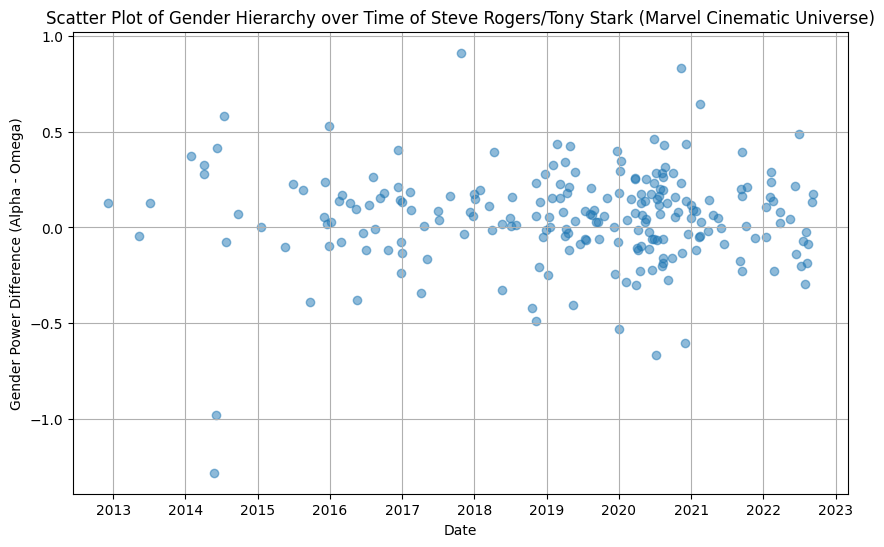

In [221]:
AO_ST_TS['year'] = AO_ST_TS['published'].dt.year
yearly_mean = AO_ST_TS.groupby('year')['gender_power_difference'].mean().reset_index()

##scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(AO_ST_TS['published'], AO_ST_TS['gender_power_difference'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Gender Power Difference (Alpha - Omega)')
plt.title('Scatter Plot of Gender Hierarchy over Time of Steve Rogers/Tony Stark (Marvel Cinematic Universe)')
plt.grid(True)
plt.show()

D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


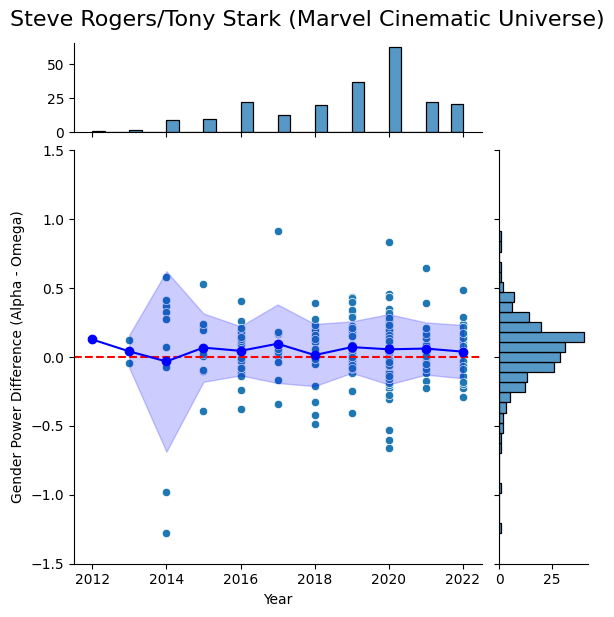

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

yearly_stats = AO_ST_TS.groupby('year')['gender_power_difference'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'mean_gender_power_difference', 'std_gender_power_difference']

joint_plot = sns.jointplot(data=AO_ST_TS, x='year', y='gender_power_difference', kind='scatter', marginal_kws=dict(bins=30, fill=True), height=6, ratio=4, marginal_ticks=True)

joint_plot.ax_joint.axhline(y=0, color='r', linestyle='--')

joint_plot.ax_joint.plot(yearly_stats['year'], yearly_stats['mean_gender_power_difference'], color='b', marker='o', label='Average Gender Power Difference')
joint_plot.ax_joint.fill_between(yearly_stats['year'], 
                 yearly_stats['mean_gender_power_difference'] - yearly_stats['std_gender_power_difference'], 
                 yearly_stats['mean_gender_power_difference'] + yearly_stats['std_gender_power_difference'], 
                 color='b', alpha=0.2)

joint_plot.set_axis_labels('Year', 'Gender Power Difference (Alpha - Omega)')
joint_plot.ax_joint.set_ylim(-1.5, 1.5)
plt.suptitle('Steve Rogers/Tony Stark (Marvel Cinematic Universe)', y=1.02, fontsize=16)

plt.show()


In [25]:
df_ST_used_full = pd.read_json('D:/Data/ABO_data/ABO_ST_0518.json', lines=True)

AO_ST_TS_merged = AO_ST_TS.merge(df_ST_used_full[['story_id', 'author']], on='story_id', how='left')

unique_authors = AO_ST_TS_merged['author'].nunique()

total_authors = AO_ST_TS_merged['author'].count()

unique_author_ratio = unique_authors / total_authors

print(f"Unique Author Ratio: {unique_author_ratio:.2%}")

Unique Author Ratio: 65.91%


In [ ]:
##CD

In [27]:
import pandas as pd
df_CD_used_full_short = pd.read_json("D:/Data/ABO_riveter_result/df_CD_used_full_short_processed.json")

In [131]:
df_CD_used_full_short_01 = df_CD_used_full_short

Castiel_0_1_count = df_CD_used_full_short_01[df_CD_used_full_short_01['Castiel_power_score'].isin([0, 1, -1])].shape[0]

Dean_0_1_count = df_CD_used_full_short_01[df_CD_used_full_short_01['Dean_power_score'].isin([0, 1, -1])].shape[0]

print("Number of rows with Castiel_power_score equal to 0 or 1 or -1:", Castiel_0_1_count)
print("Number of rows with Dean_power_score equal to 0 or 1 or -1:", Dean_0_1_count)


Number of rows with Castiel_power_score equal to 0 or 1 or -1: 75
Number of rows with Dean_power_score equal to 0 or 1 or -1: 60


In [133]:
df_CD_used_full_short_01_cleaned = df_CD_used_full_short_01[
    ~((df_CD_used_full_short_01['Castiel_power_score'].isin([0, 1, -1])) | 
      (df_CD_used_full_short_01['Dean_power_score'].isin([0, 1, -1])))
]

df_CD_used_full_short_01_cleaned.reset_index(drop=True, inplace=True)

len(df_CD_used_full_short_01_cleaned)

1011

In [134]:
df_CD_used_full_short_01_cleaned['Alpha Castiel'] = 0
df_CD_used_full_short_01_cleaned['Beta Castiel'] = 0
df_CD_used_full_short_01_cleaned['Omega Castiel'] = 0
df_CD_used_full_short_01_cleaned['Alpha Dean'] = 0
df_CD_used_full_short_01_cleaned['Beta Dean'] = 0
df_CD_used_full_short_01_cleaned['Omega Dean'] = 0

# Iterate over each row
for index, row in df_CD_used_full_short_01_cleaned.iterrows():
    genre = row['genre']
    if isinstance(genre, str):
        genre_list = genre.split('/')
    elif isinstance(genre, list):
        genre_list = genre
    else:
        genre_list = [genre] 

    for item in genre_list:
        if 'Alpha Castiel' in item or 'Alpha!Castiel' in item or 'Alpha Cas' in item or 'Alpha!Cas' in item or 'Alpha Castiel' in item:
            df_CD_used_full_short_01_cleaned.at[index, 'Alpha Castiel'] = 1
        if 'Beta Castiel' in item or 'Beta!Castiel' in item or 'Beta Cas' in item or 'Beta!Cas' in item or 'Beta Castiel' in item:
            df_CD_used_full_short_01_cleaned.at[index, 'Beta Castiel'] = 1
        if 'Omega Castiel' in item or 'Omega!Castiel' in item or 'Omega Cas' in item or 'Omega!Cas' in item or 'Omega Castiel' in item:
            df_CD_used_full_short_01_cleaned.at[index, 'Omega Castiel'] = 1
        if 'Alpha Dean' in item or 'Alpha!Dean' in item or 'Alpha Winchester' in item or 'Alpha!Winchester' in item or 'Alpha Dean Winchester' in item:
            df_CD_used_full_short_01_cleaned.at[index, 'Alpha Dean'] = 1
        if 'Beta Dean' in item or 'Beta!Dean' in item or 'Beta Winchester' in item or 'Beta!Winchester' in item or 'Beta Dean Winchester' in item:
            df_CD_used_full_short_01_cleaned.at[index, 'Beta Dean'] = 1
        if 'Omega Dean' in item or 'Omega!Dean' in item or 'Omega Winchester' in item or 'Omega!Winchester' in item or 'Omega Dean Winchester' in item:
            df_CD_used_full_short_01_cleaned.at[index, 'Omega Dean'] = 1

selected_columns = [
    'story_id', 
    'genre', 
    'Alpha Castiel', 
    'Beta Castiel', 
    'Omega Castiel', 
    'Alpha Dean', 
    'Beta Dean', 
    'Omega Dean'
]
df_checkABO_CD = df_CD_used_full_short_01_cleaned[selected_columns]

df_checkABO_CD.head()


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\588119127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CD_used_full_short_01_cleaned['Alpha Castiel'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\588119127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CD_used_full_short_01_cleaned['Beta Castiel'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\588119127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,story_id,genre,Alpha Castiel,Beta Castiel,Omega Castiel,Alpha Dean,Beta Dean,Omega Dean
0,10040507,"[Alpha Michael, Alpha/Beta/Omega Dynamics, Ana...",0,0,1,0,0,1
1,1013628,"[Alpha Benny, Alpha Dean, Alpha/Beta/Omega Dyn...",0,0,1,1,0,0
2,10140845,"[Alpha Castiel/Omega Dean Winchester, Alpha/Be...",1,0,0,0,0,1
3,1017516,"[Alpha/Beta/Omega Dynamics, Knotting, M/M, Mat...",0,0,0,0,0,0
4,1022009,"[Alpha/Beta/Omega Dynamics, Alpha/Omega, Catbo...",0,0,0,0,0,0


In [135]:
CD_id = df_CD_used_full_short_01_cleaned[(df_CD_used_full_short_01_cleaned['Alpha Castiel'] == 1) & (df_CD_used_full_short_01_cleaned['Omega Dean'] == 1)]

df_CD_used_full_short_01_cleaned['CD'] = 0

df_CD_used_full_short_01_cleaned.loc[df_CD_used_full_short_01_cleaned['story_id'].isin(CD_id['story_id']), 'CD'] = 1


DC_id = df_CD_used_full_short_01_cleaned[(df_CD_used_full_short_01_cleaned['Alpha Dean'] == 1) & (df_CD_used_full_short_01_cleaned['Omega Castiel'] == 1)]

df_CD_used_full_short_01_cleaned['DC'] = 0

df_CD_used_full_short_01_cleaned.loc[df_CD_used_full_short_01_cleaned['story_id'].isin(DC_id['story_id']), 'DC'] = 1

print(df_CD_used_full_short_01_cleaned.head())


   story_id                                      relationships   published  \
0  10040507  Castiel/Dean Winchester, Castiel/Michael (Supe...  2017-03-02   
1   1013628  Benny Lafitte/Dean Winchester, Castiel/Benny L...  2013-10-22   
2  10140845                            Castiel/Dean Winchester  2017-03-06   
3   1017516                            Castiel/Dean Winchester  2013-10-25   
4   1022009                            Castiel/Dean Winchester  2013-10-28   

                                               genre  \
0  [Alpha Michael, Alpha/Beta/Omega Dynamics, Ana...   
1  [Alpha Benny, Alpha Dean, Alpha/Beta/Omega Dyn...   
2  [Alpha Castiel/Omega Dean Winchester, Alpha/Be...   
3  [Alpha/Beta/Omega Dynamics, Knotting, M/M, Mat...   
4  [Alpha/Beta/Omega Dynamics, Alpha/Omega, Catbo...   

                                       story_content  Castiel_power_score  \
0  A Tempting Surprise\n\nHis brother Lucifer had...             0.328314   
1  Desperation\n\nAuthor's Note:\n\ndone

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\558946788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CD_used_full_short_01_cleaned['CD'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\558946788.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CD_used_full_short_01_cleaned['DC'] = 0


In [136]:
len(CD_id)

459

In [137]:
len(DC_id)

314

In [138]:
AO_CD_DC = df_CD_used_full_short_01_cleaned[(df_CD_used_full_short_01_cleaned['CD'] == 1) | (df_CD_used_full_short_01_cleaned['DC'] == 1)]


AO_CD_DC['gender_power_difference'] = 0


for index, row in AO_CD_DC.iterrows():
    if row['CD'] == 1:
        AO_CD_DC.at[index, 'gender_power_difference'] = row['Castiel_power_score'] - row['Dean_power_score']
    elif row['DC'] == 1:
        AO_CD_DC.at[index, 'gender_power_difference'] = row['Dean_power_score'] - row['Castiel_power_score']


AO_CD_DC['published'] = pd.to_datetime(AO_CD_DC['published'])


print(len(AO_CD_DC))


771


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2755546576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_CD_DC['gender_power_difference'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2755546576.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.18228425990000002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  AO_CD_DC.at[index, 'gender_power_difference'] = row['Dean_power_score'] - row['Castiel_power_score']
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2755546576.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [139]:
##additional tags:
AO_CD_DC_merged_1 = AO_CD_DC_merged.merge(df_CD_used_full[['story_id', 'additional_tags']], on='story_id', how='left')
AO_CD_DC_merged_1.drop(columns=['story_content'], inplace=True)
AO_CD_DC_merged_1.head()

AO_CD_DC_merged_1.to_csv(r"D:\Data\ABO_data\ABO_close_reading\AO_CD_DC_merged_1.csv", index=False)


In [140]:
AO_CD_DC['gender_power_difference'].describe()

count    771.000000
mean       0.092453
std        0.245118
min       -1.023787
25%       -0.038234
50%        0.092306
75%        0.228170
max        1.095238
Name: gender_power_difference, dtype: float64

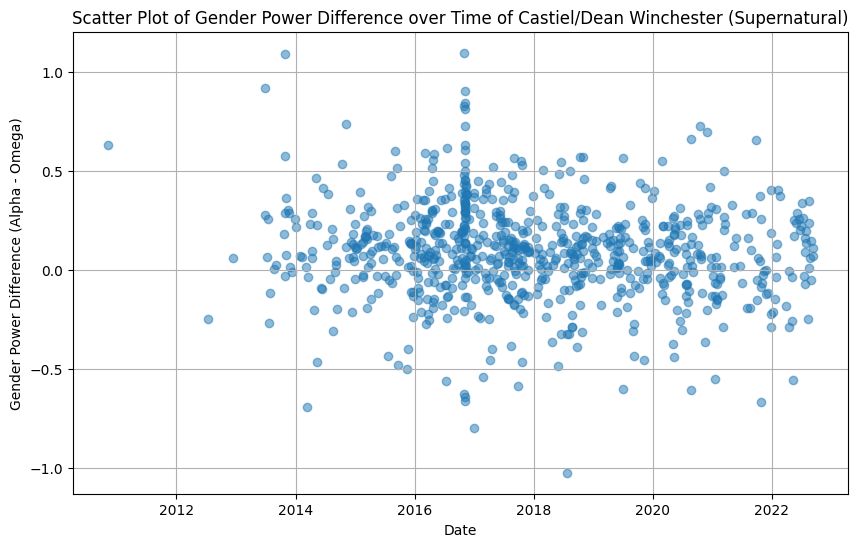

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(AO_CD_DC['published'], AO_CD_DC['gender_power_difference'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Gender Power Difference (Alpha - Omega)')
plt.title('Scatter Plot of Gender Power Difference over Time of Castiel/Dean Winchester (Supernatural)')
plt.grid(True)
plt.show()

In [143]:
AO_CD_DC['year'] = AO_CD_DC['published'].dt.year

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\1781498340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_CD_DC['year'] = AO_CD_DC['published'].dt.year


D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


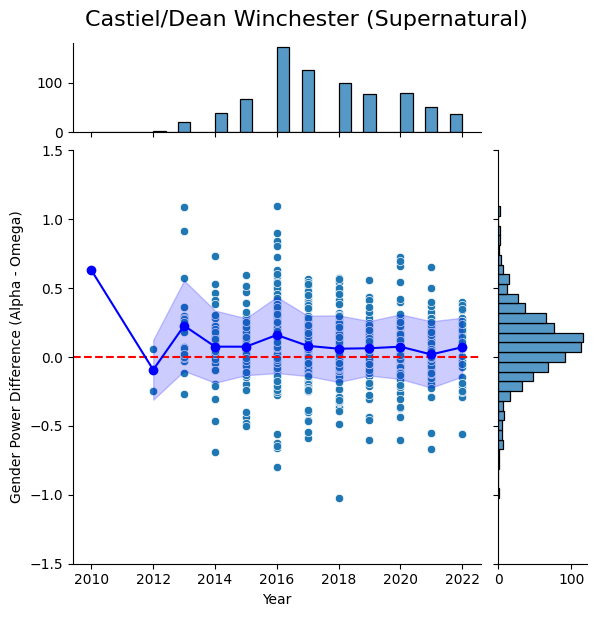

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

yearly_stats = AO_CD_DC.groupby('year')['gender_power_difference'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'mean_gender_power_difference', 'std_gender_power_difference']

joint_plot = sns.jointplot(data=AO_CD_DC, x='year', y='gender_power_difference', kind='scatter', marginal_kws=dict(bins=30, fill=True), height=6, ratio=4, marginal_ticks=True)

joint_plot.ax_joint.axhline(y=0, color='r', linestyle='--')

joint_plot.ax_joint.plot(yearly_stats['year'], yearly_stats['mean_gender_power_difference'], color='b', marker='o', label='Average Gender Power Difference')
joint_plot.ax_joint.fill_between(yearly_stats['year'], 
                 yearly_stats['mean_gender_power_difference'] - yearly_stats['std_gender_power_difference'], 
                 yearly_stats['mean_gender_power_difference'] + yearly_stats['std_gender_power_difference'], 
                 color='b', alpha=0.2)

joint_plot.set_axis_labels('Year', 'Gender Power Difference (Alpha - Omega)')

joint_plot.ax_joint.set_ylim(-1.5, 1.5)
plt.suptitle('Castiel/Dean Winchester (Supernatural)', y=1.02, fontsize=16)

plt.show()

In [145]:
df_CD_used_full = pd.read_json('D:/Data/ABO_data/ABO_CD_0517.json', lines=True)
AO_CD_DC_merged = AO_CD_DC.merge(df_CD_used_full[['story_id', 'author']], on='story_id', how='left')

unique_authors = AO_CD_DC_merged['author'].nunique()

total_authors = AO_CD_DC_merged['author'].count()

unique_author_ratio = unique_authors / total_authors

print(f"Unique Author Ratio: {unique_author_ratio:.2%}")

Unique Author Ratio: 46.82%


In [247]:
##additional tags:
AO_CD_DC_merged_1 = AO_CD_DC_merged.merge(df_CD_used_full[['story_id', 'additional_tags']], on='story_id', how='left')
AO_CD_DC_merged_1.drop(columns=['story_content'], inplace=True)
AO_CD_DC_merged_1.head()

AO_CD_DC_merged_1.to_csv(r"D:\Data\ABO_data\ABO_close_reading\AO_CD_DC_merged_1.csv", index=False)

In [ ]:
##Hannibal

In [146]:
import pandas as pd
df_WH_used_full_short = pd.read_json("D:/Data/ABO_riveter_result/df_WH_used_full_short_processed.json")

In [147]:
df_WH_used_full_short.head()

,story_id,characters,relationships,published,genre,story_content,Will_power_score,Hannibal_power_score,Alpha_power_score,Beta_power_score,Omega_power_score,Will_list,Hannibal_list,Alpha_list,Beta_list,Omega_list
0,1004925,"[Hannibal Lecter, Will Graham]",Will Graham/Hannibal Lecter,2013-10-15,"[Alpha/Beta/Omega Dynamics, Biting, Bonding, K...",Throw\n\nAuthor's Note:\n\nFirst fluffy ABO PW...,-0.106071,0.436480,-0.058333,0.0,0.383333,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,{},defaultdict(<function default_dict_int at 0x00...
1,1006720,"[Hannibal Lecter, Jack Crawford, Will Graham]",Will Graham/Hannibal Lecter,2013-10-16,"[Alpha/Beta/Omega Dynamics, Fluffy Ending, M/M...",Meds (did you forget to take your?)\n\nAuthor'...,0.558333,0.276636,0.000000,0.0,0.000000,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,{},{},{}
2,10159571,"[Hannibal Lecter, Will Graham]","Prince Charmont/Johann Struensee, Will Graham/...",2017-03-07,"[Alpha Charmont, Alpha Will, Alpha/Beta/Omega ...",The Danger of Desire\n\nAuthor's Note:\n\nFor ...,0.000000,0.161108,0.524612,0.0,0.353333,{},defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...
3,10189052,"[Hannibal Lecter, Will Graham]",Will Graham/Hannibal Lecter,2017-03-09,"[Alpha/Beta/Omega Dynamics, Fluff, M/M, One Sh...",Notes of citrus\n\nIts hard to not notice that...,-0.396429,0.147294,0.151290,0.0,0.000000,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,{},{}
4,10376418,"[Hannibal Lecter, Will Graham]",Will Graham/Hannibal Lecter,2017-03-20,"[Alpha Hannibal, Alpha/Beta/Omega Dynamics, Di...",1. Chapter 1\n\nAuthor's Note:\n\nplease do NO...,0.033333,0.271975,0.500000,0.0,0.000000,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,defaultdict(<function default_dict_int at 0x00...,{},defaultdict(<function default_dict_int at 0x00...


In [148]:
df_WH_used_full_short_01 = df_WH_used_full_short

Will_0_1_count = df_WH_used_full_short_01[df_WH_used_full_short_01['Will_power_score'].isin([0, 1, -1])].shape[0]

Hannibal_0_1_count = df_WH_used_full_short_01[df_WH_used_full_short_01['Hannibal_power_score'].isin([0, 1. -1])].shape[0]

print("Number of rows with Will_power_score equal to 0 or 1 or -1:", Will_0_1_count)
print("Number of rows with Hannibal_power_score equal to 0 or 1 or -1:", Hannibal_0_1_count)


Number of rows with Will_power_score equal to 0 or 1 or -1: 118
Number of rows with Hannibal_power_score equal to 0 or 1 or -1: 33


In [149]:
df_WH_used_full_short_01_cleaned = df_WH_used_full_short_01[
    ~((df_WH_used_full_short_01['Will_power_score'].isin([0, 1, -1])) | 
      (df_WH_used_full_short_01['Hannibal_power_score'].isin([0, 1, -1])))
]

df_WH_used_full_short_01_cleaned.reset_index(drop=True, inplace=True)

len(df_WH_used_full_short_01_cleaned)


330

In [150]:
import pandas as pd

df_WH_used_full_short_01_cleaned['Alpha Will'] = 0
df_WH_used_full_short_01_cleaned['Beta Will'] = 0
df_WH_used_full_short_01_cleaned['Omega Will'] = 0
df_WH_used_full_short_01_cleaned['Alpha Hannibal'] = 0
df_WH_used_full_short_01_cleaned['Beta Hannibal'] = 0
df_WH_used_full_short_01_cleaned['Omega Hannibal'] = 0


alpha_will_keywords = [x.lower() for x in ['Alpha Will', 'Alpha!Will', 'Alpha Will Graham', 'Alpha!Will Graham']]
beta_will_keywords = [x.lower() for x in ['Beta Will', 'Beta!Will', 'Beta Will Graham', 'Beta!Will Graham']]
omega_will_keywords = [x.lower() for x in ['Omega Will', 'Omega!Will', 'Omega Will Graham', 'Omega!Will Graham']]
alpha_hannibal_keywords = [x.lower() for x in ['Alpha Hannibal', 'Alpha!Hannibal', 'Alpha Hannibal', 'Alpha!Hannibal Lecter']]
beta_hannibal_keywords = [x.lower() for x in ['Beta Hannibal', 'Beta!Hannibal', 'Beta Hannibal Lecter', 'Beta!Hannibal Lecter']]
omega_hannibal_keywords = [x.lower() for x in ['Omega Hannibal', 'Omega!Hannibal', 'Omega Hannibal Lecter', 'Omega!Hannibal Lecter']]


for index, row in df_WH_used_full_short_01_cleaned.iterrows():
    genre_list = row['genre']  
    genre_string = ' '.join(genre_list).lower()  
    if any(keyword in genre_string for keyword in alpha_will_keywords):
        df_WH_used_full_short_01_cleaned.at[index, 'Alpha Will'] = 1
    if any(keyword in genre_string for keyword in beta_will_keywords):
        df_WH_used_full_short_01_cleaned.at[index, 'Beta Will'] = 1
    if any(keyword in genre_string for keyword in omega_will_keywords):
        df_WH_used_full_short_01_cleaned.at[index, 'Omega Will'] = 1
    if any(keyword in genre_string for keyword in alpha_hannibal_keywords):
        df_WH_used_full_short_01_cleaned.at[index, 'Alpha Hannibal'] = 1
    if any(keyword in genre_string for keyword in beta_hannibal_keywords):
        df_WH_used_full_short_01_cleaned.at[index, 'Beta Hannibal'] = 1
    if any(keyword in genre_string for keyword in omega_hannibal_keywords):
        df_WH_used_full_short_01_cleaned.at[index, 'Omega Hannibal'] = 1


selected_columns = [
    'story_id', 
    'genre', 
    'Alpha Will', 
    'Beta Will', 
    'Omega Will', 
    'Alpha Hannibal', 
    'Beta Hannibal', 
    'Omega Hannibal'
]
df_checkABO_WH = df_WH_used_full_short_01_cleaned[selected_columns]


print(df_checkABO_WH.head())


   story_id                                              genre  Alpha Will  \
0   1004925  [Alpha/Beta/Omega Dynamics, Biting, Bonding, K...           0   
1   1006720  [Alpha/Beta/Omega Dynamics, Fluffy Ending, M/M...           0   
2  10189052  [Alpha/Beta/Omega Dynamics, Fluff, M/M, One Sh...           0   
3  10376418  [Alpha Hannibal, Alpha/Beta/Omega Dynamics, Di...           0   
4  10453731  [Alpha Hannibal, Alpha/Beta/Omega Dynamics, Bi...           0   

   Beta Will  Omega Will  Alpha Hannibal  Beta Hannibal  Omega Hannibal  
0          0           0               0              0               0  
1          0           0               0              0               0  
2          0           0               0              0               0  
3          0           1               1              0               0  
4          0           1               1              0               0  


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3737414523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WH_used_full_short_01_cleaned['Alpha Will'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3737414523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WH_used_full_short_01_cleaned['Beta Will'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3737414523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [153]:
import pandas as pd


WH_id = df_WH_used_full_short_01_cleaned[(df_WH_used_full_short_01_cleaned['Alpha Will'] == 1) & (df_WH_used_full_short_01_cleaned['Omega Hannibal'] == 1)]


df_WH_used_full_short_01_cleaned['WH'] = 0

df_WH_used_full_short_01_cleaned.loc[df_WH_used_full_short_01_cleaned['story_id'].isin(WH_id['story_id']), 'WH'] = 1


HW_id = df_WH_used_full_short_01_cleaned[(df_WH_used_full_short_01_cleaned['Alpha Hannibal'] == 1) & (df_WH_used_full_short_01_cleaned['Omega Will'] == 1)]

df_WH_used_full_short_01_cleaned['HW'] = 0

df_WH_used_full_short_01_cleaned.loc[df_WH_used_full_short_01_cleaned['story_id'].isin(HW_id['story_id']), 'HW'] = 1

print(df_WH_used_full_short_01_cleaned.head())


   story_id                                     characters  \
0   1004925                 [Hannibal Lecter, Will Graham]   
1   1006720  [Hannibal Lecter, Jack Crawford, Will Graham]   
2  10189052                 [Hannibal Lecter, Will Graham]   
3  10376418                 [Hannibal Lecter, Will Graham]   
4  10453731                 [Hannibal Lecter, Will Graham]   

                 relationships   published  \
0  Will Graham/Hannibal Lecter  2013-10-15   
1  Will Graham/Hannibal Lecter  2013-10-16   
2  Will Graham/Hannibal Lecter  2017-03-09   
3  Will Graham/Hannibal Lecter  2017-03-20   
4  Will Graham/Hannibal Lecter  2017-03-26   

                                               genre  \
0  [Alpha/Beta/Omega Dynamics, Biting, Bonding, K...   
1  [Alpha/Beta/Omega Dynamics, Fluffy Ending, M/M...   
2  [Alpha/Beta/Omega Dynamics, Fluff, M/M, One Sh...   
3  [Alpha Hannibal, Alpha/Beta/Omega Dynamics, Di...   
4  [Alpha Hannibal, Alpha/Beta/Omega Dynamics, Bi...   

             

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3789137804.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WH_used_full_short_01_cleaned['WH'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3789137804.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WH_used_full_short_01_cleaned['HW'] = 0


In [154]:
len(WH_id)

41

In [155]:
len(HW_id)

189

In [159]:
AO_WH_HW = df_WH_used_full_short_01_cleaned[(df_WH_used_full_short_01_cleaned['WH'] == 1) | (df_WH_used_full_short_01_cleaned['HW'] == 1)]


AO_WH_HW['gender_power_difference'] = 0


for index, row in AO_WH_HW.iterrows():
    if row['WH'] == 1:
        AO_WH_HW.at[index, 'gender_power_difference'] = row['Will_power_score'] - row['Hannibal_power_score']
    elif row['HW'] == 1:
        AO_WH_HW.at[index, 'gender_power_difference'] = row['Hannibal_power_score'] - row['Will_power_score']

AO_WH_HW['published'] = pd.to_datetime(AO_WH_HW['published'])

print(len(AO_WH_HW))


228


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2636283760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_WH_HW['gender_power_difference'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2636283760.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.23864170070000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  AO_WH_HW.at[index, 'gender_power_difference'] = row['Hannibal_power_score'] - row['Will_power_score']
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2636283760.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [248]:
##additional tags:
AO_WH_HW_merged_1 = AO_WH_HW_merged.merge(df_WH_used_full[['story_id', 'additional_tags']], on='story_id', how='left')
AO_WH_HW_merged_1.drop(columns=['story_content'], inplace=True)
AO_WH_HW_merged_1.head()

AO_WH_HW_merged_1.to_csv(r"D:\Data\ABO_data\ABO_close_reading\AO_WH_HW_merged_2.csv", index=False)


In [158]:
AO_WH_HW['gender_power_difference'].describe()

count    228.000000
mean       0.285113
std        0.384073
min       -0.729504
25%        0.046053
50%        0.325224
75%        0.558346
max        1.370812
Name: gender_power_difference, dtype: float64

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\4203352497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_WH_HW['year'] = AO_WH_HW['published'].dt.year


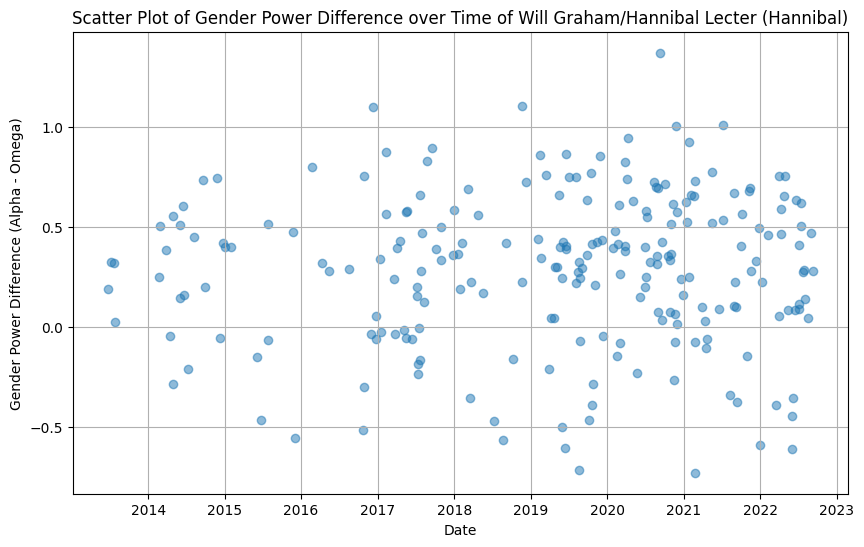

In [161]:
AO_WH_HW['year'] = AO_WH_HW['published'].dt.year
yearly_mean = AO_WH_HW.groupby('year')['gender_power_difference'].mean().reset_index()

##scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(AO_WH_HW['published'], AO_WH_HW['gender_power_difference'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Gender Power Difference (Alpha - Omega)')
plt.title('Scatter Plot of Gender Power Difference over Time of Will Graham/Hannibal Lecter (Hannibal)')
plt.grid(True)
plt.show()

D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


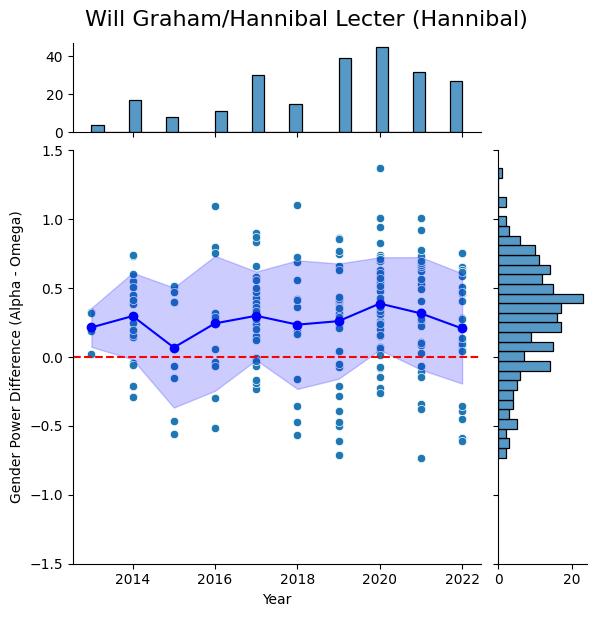

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

yearly_stats = AO_WH_HW.groupby('year')['gender_power_difference'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'mean_gender_power_difference', 'std_gender_power_difference']

joint_plot = sns.jointplot(data=AO_WH_HW, x='year', y='gender_power_difference', kind='scatter', marginal_kws=dict(bins=30, fill=True), height=6, ratio=4, marginal_ticks=True)

joint_plot.ax_joint.axhline(y=0, color='r', linestyle='--')

joint_plot.ax_joint.plot(yearly_stats['year'], yearly_stats['mean_gender_power_difference'], color='b', marker='o', label='Average Gender Power Difference')
joint_plot.ax_joint.fill_between(yearly_stats['year'], 
                 yearly_stats['mean_gender_power_difference'] - yearly_stats['std_gender_power_difference'], 
                 yearly_stats['mean_gender_power_difference'] + yearly_stats['std_gender_power_difference'], 
                 color='b', alpha=0.2)

joint_plot.set_axis_labels('Year', 'Gender Power Difference (Alpha - Omega)')

joint_plot.ax_joint.set_ylim(-1.5, 1.5)
plt.suptitle('Will Graham/Hannibal Lecter (Hannibal)', y=1.02, fontsize=16)

plt.show()

In [163]:
df_WH_used_full = pd.read_json('D:/Data/ABO_data/ABO_WH_0520.json', lines=True)
AO_WH_HW_merged = AO_WH_HW.merge(df_WH_used_full[['story_id', 'author']], on='story_id', how='left')

unique_authors = AO_WH_HW_merged['author'].nunique()

total_authors = AO_WH_HW_merged['author'].count()

unique_author_ratio = unique_authors / total_authors

print(f"Unique Author Ratio: {unique_author_ratio:.2%}")

Unique Author Ratio: 68.42%


In [ ]:
##BM

In [164]:
import pandas as pd
df_BM_used_full_short = pd.read_json("D:/Data/ABO_riveter_result/df_BM_used_full_short_processed.json")

In [165]:
df_BM_used_full_short_01 = df_BM_used_full_short

Bakugou_0_1_count = df_BM_used_full_short_01[df_BM_used_full_short_01['Bakugou_power_score'].isin([0, 1, -1])].shape[0]

Midoriya_0_1_count = df_BM_used_full_short_01[df_BM_used_full_short_01['Midoriya_power_score'].isin([0, 1, -1])].shape[0]

print("Number of rows with Bakugou_power_score equal to 0 or 1 or -1:", Bakugou_0_1_count)
print("Number of rows with Midoriya_power_score equal to 0 or 1 or -1:", Midoriya_0_1_count)


Number of rows with Bakugou_power_score equal to 0 or 1 or -1: 127
Number of rows with Midoriya_power_score equal to 0 or 1 or -1: 85


In [167]:
df_BM_used_full_short_01_cleaned = df_BM_used_full_short_01[
    ~((df_BM_used_full_short_01['Bakugou_power_score'].isin([0, 1, -1])) | 
      (df_BM_used_full_short_01['Midoriya_power_score'].isin([0, 1, -1])))
]

df_BM_used_full_short_01_cleaned.reset_index(drop=True, inplace=True)

len(df_BM_used_full_short_01_cleaned)

1107

In [168]:
df_BM_used_full_short_01_cleaned['Alpha Bakugou'] = 0
df_BM_used_full_short_01_cleaned['Beta Bakugou'] = 0
df_BM_used_full_short_01_cleaned['Omega Bakugou'] = 0
df_BM_used_full_short_01_cleaned['Alpha Midoriya'] = 0
df_BM_used_full_short_01_cleaned['Beta Midoriya'] = 0
df_BM_used_full_short_01_cleaned['Omega Midoriya'] = 0

for index, row in df_BM_used_full_short_01_cleaned.iterrows():
    genre = row['genre']
    if 'Alpha Bakugou' in genre or 'Alpha!Bakugou' in genre or 'Alpha Katsuki' in genre or 'Alpha!Katsuki' in genre or 'Alpha Bakugou Katsuki' in genre:
        df_BM_used_full_short_01_cleaned.at[index, 'Alpha Bakugou'] = 1
    if 'Beta Bakugou' in genre or 'Beta!Bakugou' in genre or 'Beta Katsuki' in genre or 'Beta!Katsuki' in genre or 'Beta Bakugou Katsuki' in genre:
        df_BM_used_full_short_01_cleaned.at[index, 'Beta Bakugou'] = 1
    if 'Omega Bakugou' in genre or 'Omega!Bakugou' in genre or 'Omega Katsuki' in genre or 'Omega!Katsuki' in genre or 'Omega Bakugou Katsuki' in genre:
        df_BM_used_full_short_01_cleaned.at[index, 'Omega Bakugou'] = 1
    if 'Alpha Midoriya' in genre or 'Alpha!Midoriya' in genre or 'Alpha Izuku' in genre or 'Alpha!Izuku' in genre or 'Alpha Midoriya Izuku' in genre:
        df_BM_used_full_short_01_cleaned.at[index, 'Alpha Midoriya'] = 1
    if 'Beta Midoriya' in genre or 'Beta!Midoriya' in genre or 'Beta Izuku' in genre or 'Beta!Izuku' in genre or 'Beta Midoriya Izuku' in genre:
        df_BM_used_full_short_01_cleaned.at[index, 'Beta Midoriya'] = 1
    if 'Omega Midoriya' in genre or 'Omega!Midoriya' in genre or 'Omega Izuku' in genre or 'Omega!Izuku' in genre or 'Omega Midoriya Izuku' in genre:
        df_BM_used_full_short_01_cleaned.at[index, 'Omega Midoriya'] = 1

selected_columns = [
    'story_id', 
    'genre', 
    'Alpha Bakugou', 
    'Beta Bakugou', 
    'Omega Bakugou', 
    'Alpha Midoriya', 
    'Beta Midoriya', 
    'Omega Midoriya'
]
df_checkABO_BM = df_BM_used_full_short_01_cleaned[selected_columns]

df_checkABO_BM.head()


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\118154841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BM_used_full_short_01_cleaned['Alpha Bakugou'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\118154841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BM_used_full_short_01_cleaned['Beta Bakugou'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\118154841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,story_id,genre,Alpha Bakugou,Beta Bakugou,Omega Bakugou,Alpha Midoriya,Beta Midoriya,Omega Midoriya
0,10718370,"[Alpha Bakugou, Alpha/Beta/Omega Dynamics, Alp...",1,0,0,0,0,1
1,10853679,"[Alpha!Bakugou, Alpha!Katsuki, Alpha!Ochako, A...",1,0,0,0,0,0
2,10916445,"[Alpha Bakugou, Alpha/Beta/Omega Dynamics, Ana...",1,0,0,0,0,0
3,11304702,"[Alpha Katsuki, Alpha/Beta/Omega Dynamics, Dad...",1,0,0,0,0,0
4,11369412,"[Accidental Knotting, Adorable Midoriya Izuku,...",0,0,0,0,0,0


In [169]:
BM_id = df_BM_used_full_short_01_cleaned[(df_BM_used_full_short_01_cleaned['Alpha Bakugou'] == 1) & (df_BM_used_full_short_01_cleaned['Omega Midoriya'] == 1)]

df_BM_used_full_short_01_cleaned['BM'] = 0

df_BM_used_full_short_01_cleaned.loc[df_BM_used_full_short_01_cleaned['story_id'].isin(BM_id['story_id']), 'BM'] = 1

MB_id = df_BM_used_full_short_01_cleaned[(df_BM_used_full_short_01_cleaned['Alpha Midoriya'] == 1) & (df_BM_used_full_short_01_cleaned['Omega Bakugou'] == 1)]

df_BM_used_full_short_01_cleaned['MB'] = 0

df_BM_used_full_short_01_cleaned.loc[df_BM_used_full_short_01_cleaned['story_id'].isin(MB_id['story_id']), 'MB'] = 1

print(df_BM_used_full_short_01_cleaned.head())


   story_id                                         characters  \
0  10718370  [Bakugou Katsuki, Iida Tenya, Midoriya Izuku, ...   
1  10853679                  [Bakugou Katsuki, Midoriya Izuku]   
2  10916445  [Aizawa Shouta | Eraserhead, Bakugou Katsuki, ...   
3  11304702  [Bakugou Katsuki, Iida Tenya, Midoriya Izuku, ...   
4  11369412  [Asui Tsuyu, Bakugou Katsuki, Class 1-A (My He...   

                                       relationships   published  \
0  Bakugou Katsuki & Midoriya Izuku, Bakugou Kats...  2017-04-24   
1                     Bakugou Katsuki/Midoriya Izuku  2017-05-08   
2  Bakugou Katsuki/Kirishima Eijirou, Bakugou Kat...  2017-05-17   
3                     Bakugou Katsuki/Midoriya Izuku  2017-06-26   
4  Bakugou Katsuki/Midoriya Izuku, Midoriya Izuku...  2017-07-04   

                                               genre  \
0  [Alpha Bakugou, Alpha/Beta/Omega Dynamics, Alp...   
1  [Alpha!Bakugou, Alpha!Katsuki, Alpha!Ochako, A...   
2  [Alpha Bakugou, Alpha/B

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3421218897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BM_used_full_short_01_cleaned['BM'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3421218897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BM_used_full_short_01_cleaned['MB'] = 0


In [170]:
len(BM_id)

612

In [171]:
len(MB_id)

182

In [172]:
AO_BM_MB = df_BM_used_full_short_01_cleaned[(df_BM_used_full_short_01_cleaned['BM'] == 1) | (df_BM_used_full_short_01_cleaned['MB'] == 1)]


AO_BM_MB['gender_power_difference'] = 0

for index, row in AO_BM_MB.iterrows():
    if row['BM'] == 1:
        AO_BM_MB.at[index, 'gender_power_difference'] = row['Bakugou_power_score'] - row['Midoriya_power_score']
    elif row['MB'] == 1:
        AO_BM_MB.at[index, 'gender_power_difference'] = row['Midoriya_power_score'] - row['Bakugou_power_score']

AO_BM_MB['published'] = pd.to_datetime(AO_BM_MB['published'])
AO_BM_MB['year'] = AO_BM_MB['published'].dt.year
print(len(AO_BM_MB))


792


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\1400206928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_BM_MB['gender_power_difference'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\1400206928.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.023322723200000006' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  AO_BM_MB.at[index, 'gender_power_difference'] = row['Bakugou_power_score'] - row['Midoriya_power_score']
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\1400206928.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [173]:
AO_BM_MB['gender_power_difference'].describe()

count    792.000000
mean       0.083850
std        0.228258
min       -1.266667
25%       -0.033569
50%        0.091905
75%        0.206439
max        0.928788
Name: gender_power_difference, dtype: float64

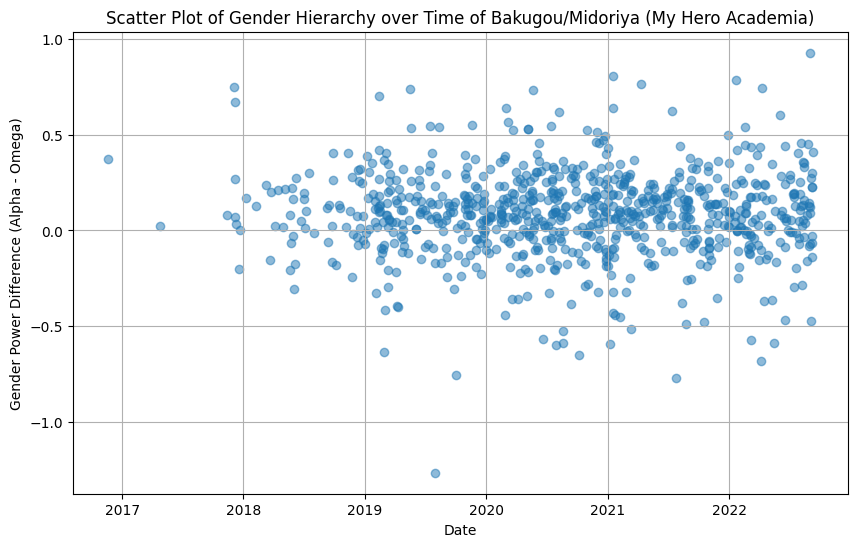

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(AO_BM_MB['published'], AO_BM_MB['gender_power_difference'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Gender Power Difference (Alpha - Omega)')
plt.title('Scatter Plot of Gender Hierarchy over Time of Bakugou/Midoriya (My Hero Academia)')
plt.grid(True)
plt.show()

D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


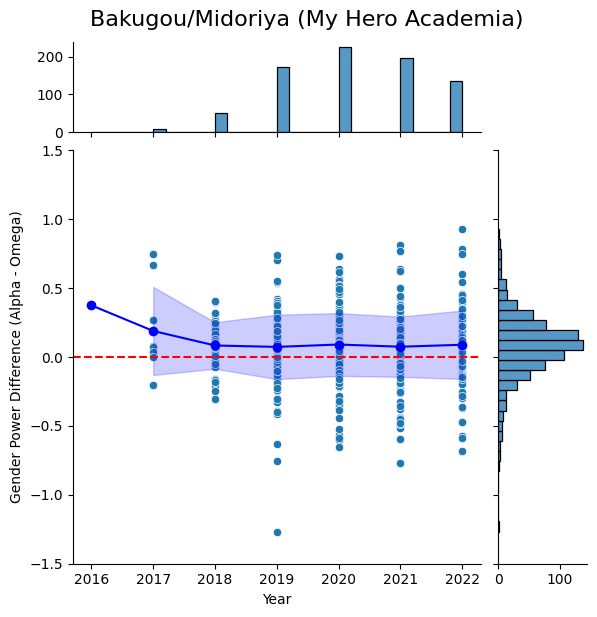

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

yearly_stats = AO_BM_MB.groupby('year')['gender_power_difference'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'mean_gender_power_difference', 'std_gender_power_difference']

joint_plot = sns.jointplot(data=AO_BM_MB, x='year', y='gender_power_difference', kind='scatter', marginal_kws=dict(bins=30, fill=True), height=6, ratio=4, marginal_ticks=True)

joint_plot.ax_joint.axhline(y=0, color='r', linestyle='--')

joint_plot.ax_joint.plot(yearly_stats['year'], yearly_stats['mean_gender_power_difference'], color='b', marker='o', label='Average Gender Power Difference')
joint_plot.ax_joint.fill_between(yearly_stats['year'], 
                 yearly_stats['mean_gender_power_difference'] - yearly_stats['std_gender_power_difference'], 
                 yearly_stats['mean_gender_power_difference'] + yearly_stats['std_gender_power_difference'], 
                 color='b', alpha=0.2)

joint_plot.set_axis_labels('Year', 'Gender Power Difference (Alpha - Omega)')
joint_plot.ax_joint.set_ylim(-1.5, 1.5)
plt.suptitle('Bakugou/Midoriya (My Hero Academia)', y=1.02, fontsize=16)

plt.show()

In [176]:
df_BM_used_full = pd.read_json('D:/Data/ABO_data/ABO_BM_0520.json', lines=True)
AO_BM_MB_merged = AO_BM_MB.merge(df_BM_used_full[['story_id', 'author']], on='story_id', how='left')

unique_authors = AO_BM_MB_merged['author'].nunique()

total_authors = AO_BM_MB_merged['author'].count()

unique_author_ratio = unique_authors / total_authors

print(f"Unique Author Ratio: {unique_author_ratio:.2%}")

Unique Author Ratio: 62.75%


In [177]:

AO_BM_MB_merged_1 = AO_BM_MB_merged.merge(df_BM_used_full[['story_id', 'additional_tags']], on='story_id', how='left')
AO_BM_MB_merged_1.drop(columns=['story_content'], inplace=True)
AO_BM_MB_merged_1.head()

AO_BM_MB_merged_1.to_csv(r"D:\Data\ABO_data\ABO_close_reading\AO_BM_MB_merged_1.csv", index=False)


In [ ]:
##Yuri

In [180]:
df_YV_used_full = pd.read_json('D:/Data/ABO_data/ABO_YV_0519.json', lines=True)

In [181]:
import pandas as pd
df_YV_used_full_short = pd.read_json("D:/Data/ABO_riveter_result/df_YV_used_full_short_processed.json")
len(df_YV_used_full_short)

547

In [182]:
df_YV_used_full_short_01 = df_YV_used_full_short

Yuuri_0_1_count = df_YV_used_full_short_01[df_YV_used_full_short_01['Yuuri_power_score'].isin([0, 1, -1])].shape[0]

Victor_0_1_count = df_YV_used_full_short_01[df_YV_used_full_short_01['Victor_power_score'].isin([0, 1, -1])].shape[0]

print("Number of rows with Yuuri_power_score equal to 0 or 1 or -1:", Yuuri_0_1_count)
print("Number of rows with Victor_power_score equal to 0 or 1 or -1:", Victor_0_1_count)

Number of rows with Yuuri_power_score equal to 0 or 1 or -1: 58
Number of rows with Victor_power_score equal to 0 or 1 or -1: 50


In [183]:
df_YV_used_full_short_01_cleaned = df_YV_used_full_short_01[
    ~((df_YV_used_full_short_01['Yuuri_power_score'].isin([0, 1, -1])) | 
      (df_YV_used_full_short_01['Victor_power_score'].isin([0, 1, -1])))
]

df_YV_used_full_short_01_cleaned.reset_index(drop=True, inplace=True)

len(df_YV_used_full_short_01_cleaned)



460

In [184]:
df_YV_used_full_short_01_cleaned['Alpha Yuuri'] = 0
df_YV_used_full_short_01_cleaned['Beta Yuuri'] = 0
df_YV_used_full_short_01_cleaned['Omega Yuuri'] = 0
df_YV_used_full_short_01_cleaned['Alpha Victor'] = 0
df_YV_used_full_short_01_cleaned['Beta Victor'] = 0
df_YV_used_full_short_01_cleaned['Omega Victor'] = 0


alpha_yuuri_keywords = [x.lower() for x in ['Alpha Yuuri', 'Alpha!Yuuri', 'Alpha Katsuki Yuuri', 'Alpha!Katsuki Yuuri']]
beta_yuuri_keywords = [x.lower() for x in ['Beta Yuuri', 'Beta!Yuuri', 'Beta Katsuki Yuuri', 'Beta!Katsuki Yuuri']]
omega_yuuri_keywords = [x.lower() for x in ['Omega Yuuri', 'Omega!Yuuri', 'Omega Katsuki Yuuri', 'Omega!Katsuki Yuuri']]
alpha_victor_keywords = [x.lower() for x in ['Alpha Victor', 'Alpha!Victor', 'Alpha Victor Nikiforov', 'Alpha!Victor Nikiforov']]
beta_victor_keywords = [x.lower() for x in ['Beta Victor', 'Beta!Victor', 'Beta Victor Nikiforov', 'Beta!Victor Nikiforov']]
omega_victor_keywords = [x.lower() for x in ['Omega Victor', 'Omega!Victor', 'Omega Victor Nikiforov', 'Omega!Victor Nikiforov']]


for index, row in df_YV_used_full_short_01_cleaned.iterrows():
    genre_list = row['genre']  
    genre_string = ' '.join(genre_list).lower()  
    if any(keyword in genre_string for keyword in alpha_yuuri_keywords):
        df_YV_used_full_short_01_cleaned.at[index, 'Alpha Yuuri'] = 1
    if any(keyword in genre_string for keyword in beta_yuuri_keywords):
        df_YV_used_full_short_01_cleaned.at[index, 'Beta Yuuri'] = 1
    if any(keyword in genre_string for keyword in omega_yuuri_keywords):
        df_YV_used_full_short_01_cleaned.at[index, 'Omega Yuuri'] = 1
    if any(keyword in genre_string for keyword in alpha_victor_keywords):
        df_YV_used_full_short_01_cleaned.at[index, 'Alpha Victor'] = 1
    if any(keyword in genre_string for keyword in beta_victor_keywords):
        df_YV_used_full_short_01_cleaned.at[index, 'Beta Victor'] = 1
    if any(keyword in genre_string for keyword in omega_victor_keywords):
        df_YV_used_full_short_01_cleaned.at[index, 'Omega Victor'] = 1

selected_columns = [
    'story_id', 
    'genre', 
    'Alpha Yuuri', 
    'Beta Yuuri', 
    'Omega Yuuri', 
    'Alpha Victor', 
    'Beta Victor', 
    'Omega Victor'
]
df_checkABO_YV = df_YV_used_full_short_01_cleaned[selected_columns]

print(df_checkABO_YV.head())


   story_id                                              genre  Alpha Yuuri  \
0  10100084  [Alpha Victor Nikiforov, Alpha Viktor, Alpha/B...            0   
1  10183892  [Alpha/Beta/Omega Dynamics, Alpha/Omega, Fluff...            0   
2  10254596  [Alpha/Beta/Omega Dynamics, M/M, Omega Victor,...            1   
3  10313834  [Alpha Victor Nikiforov, Alpha/Beta/Omega Dyna...            0   
4  10390032  [Alpha/Beta/Omega Dynamics, Alpha/Omega, M/M, ...            0   

   Beta Yuuri  Omega Yuuri  Alpha Victor  Beta Victor  Omega Victor  
0           0            1             1            0             0  
1           0            0             0            0             0  
2           0            0             0            0             1  
3           0            1             1            0             0  
4           0            0             0            0             0  


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3068024217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_YV_used_full_short_01_cleaned['Alpha Yuuri'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3068024217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_YV_used_full_short_01_cleaned['Beta Yuuri'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3068024217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [185]:
YV_id = df_YV_used_full_short_01_cleaned[(df_YV_used_full_short_01_cleaned['Alpha Yuuri'] == 1) & (df_YV_used_full_short_01_cleaned['Omega Victor'] == 1)]

df_YV_used_full_short_01_cleaned['YV'] = 0

df_YV_used_full_short_01_cleaned.loc[df_YV_used_full_short_01_cleaned['story_id'].isin(YV_id['story_id']), 'YV'] = 1

VY_id = df_YV_used_full_short_01_cleaned[(df_YV_used_full_short_01_cleaned['Alpha Victor'] == 1) & (df_YV_used_full_short_01_cleaned['Omega Yuuri'] == 1)]

df_YV_used_full_short_01_cleaned['VY'] = 0

df_YV_used_full_short_01_cleaned.loc[df_YV_used_full_short_01_cleaned['story_id'].isin(VY_id['story_id']), 'VY'] = 1

print(df_YV_used_full_short_01_cleaned.head())


   story_id                                         characters  \
0  10100084                  [Katsuki Yuuri, Victor Nikiforov]   
1  10183892                  [Katsuki Yuuri, Victor Nikiforov]   
2  10254596                                                 []   
3  10313834                  [Katsuki Yuuri, Victor Nikiforov]   
4  10390032  [Katsuki Yuuri, Otabek Altin, Victor Nikiforov...   

                                       relationships   published  \
0                     Katsuki Yuuri/Victor Nikiforov  2017-03-05   
1                     Katsuki Yuuri/Victor Nikiforov  2017-03-08   
2                     Katsuki Yuuri/Victor Nikiforov  2017-03-13   
3                     Katsuki Yuuri/Victor Nikiforov  2017-03-15   
4  Katsuki Yuuri/Victor Nikiforov, Otabek Altin/Y...  2017-03-21   

                                               genre  \
0  [Alpha Victor Nikiforov, Alpha Viktor, Alpha/B...   
1  [Alpha/Beta/Omega Dynamics, Alpha/Omega, Fluff...   
2  [Alpha/Beta/Omega Dynam

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\1377815554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_YV_used_full_short_01_cleaned['YV'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\1377815554.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_YV_used_full_short_01_cleaned['VY'] = 0


In [186]:
len(YV_id)

63

In [187]:
len(VY_id)

220

In [188]:
AO_YV_VY = df_YV_used_full_short_01_cleaned[(df_YV_used_full_short_01_cleaned['YV'] == 1) | (df_YV_used_full_short_01_cleaned['VY'] == 1)]

AO_YV_VY['gender_power_difference'] = 0

for index, row in AO_YV_VY.iterrows():
    if row['YV'] == 1:
        AO_YV_VY.at[index, 'gender_power_difference'] = row['Yuuri_power_score'] - row['Victor_power_score']
    elif row['VY'] == 1:
        AO_YV_VY.at[index, 'gender_power_difference'] = row['Victor_power_score'] - row['Yuuri_power_score']

AO_YV_VY['published'] = pd.to_datetime(AO_YV_VY['published'])

print(len(AO_YV_VY))

283


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\170000440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_YV_VY['gender_power_difference'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\170000440.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.3421516755' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  AO_YV_VY.at[index, 'gender_power_difference'] = row['Victor_power_score'] - row['Yuuri_power_score']
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\170000440.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [189]:
AO_YV_VY['gender_power_difference'].describe()

count    283.000000
mean       0.046665
std        0.215431
min       -0.815851
25%       -0.068787
50%        0.054706
75%        0.170981
max        0.758182
Name: gender_power_difference, dtype: float64

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\4200759436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_YV_VY['year'] = AO_YV_VY['published'].dt.year


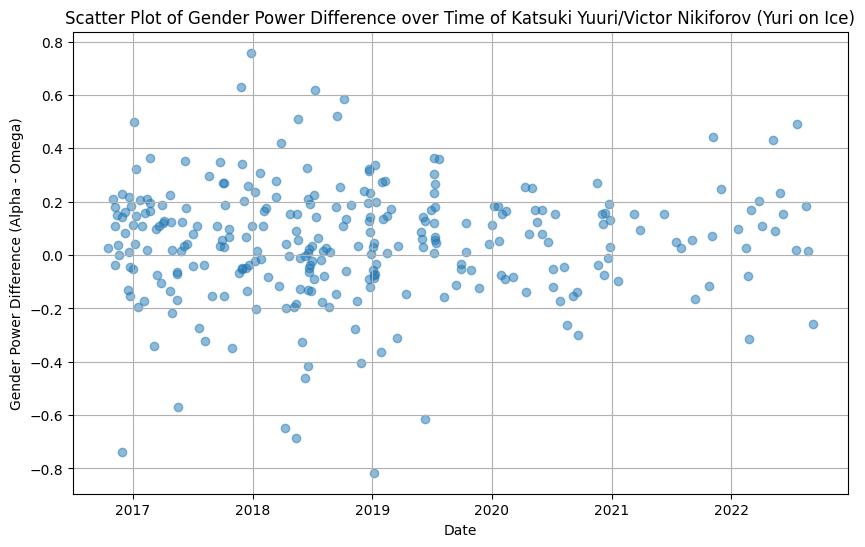

In [190]:
import matplotlib.pyplot as plt
AO_YV_VY['year'] = AO_YV_VY['published'].dt.year
yearly_mean = AO_YV_VY.groupby('year')['gender_power_difference'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(AO_YV_VY['published'], AO_YV_VY['gender_power_difference'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Gender Power Difference (Alpha - Omega)')
plt.title('Scatter Plot of Gender Power Difference over Time of Yuuri/Victor (Yuri on Ice)')
plt.grid(True)
plt.show()


D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


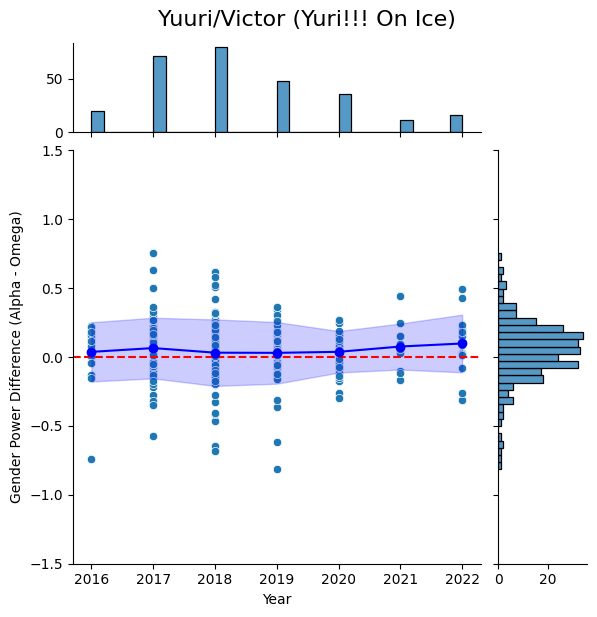

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

yearly_stats = AO_YV_VY.groupby('year')['gender_power_difference'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'mean_gender_power_difference', 'std_gender_power_difference']

joint_plot = sns.jointplot(data=AO_YV_VY, x='year', y='gender_power_difference', kind='scatter', marginal_kws=dict(bins=30, fill=True), height=6, ratio=4, marginal_ticks=True)


joint_plot.ax_joint.axhline(y=0, color='r', linestyle='--')

joint_plot.ax_joint.plot(yearly_stats['year'], yearly_stats['mean_gender_power_difference'], color='b', marker='o', label='Average Gender Power Difference')
joint_plot.ax_joint.fill_between(yearly_stats['year'], 
                 yearly_stats['mean_gender_power_difference'] - yearly_stats['std_gender_power_difference'], 
                 yearly_stats['mean_gender_power_difference'] + yearly_stats['std_gender_power_difference'], 
                 color='b', alpha=0.2)

joint_plot.set_axis_labels('Year', 'Gender Power Difference (Alpha - Omega)')
joint_plot.ax_joint.set_ylim(-1.5, 1.5)
plt.suptitle('Yuuri/Victor (Yuri!!! On Ice)', y=1.02, fontsize=16)

plt.show()

In [192]:
AO_YV_VY_merged = AO_YV_VY.merge(df_YV_used_full[['story_id', 'author']], on='story_id', how='left')

unique_authors = AO_YV_VY_merged['author'].nunique()

total_authors = AO_YV_VY_merged['author'].count()

unique_author_ratio = unique_authors / total_authors

print(f"Unique Author Ratio: {unique_author_ratio:.2%}")

Unique Author Ratio: 61.48%


In [193]:
AO_YV_VY_merged_1 = AO_YV_VY_merged.merge(df_YV_used_full[['story_id', 'additional_tags']], on='story_id', how='left')
AO_YV_VY_merged_1.drop(columns=['story_content'], inplace=True)
AO_YV_VY_merged_1.head()

AO_YV_VY_merged_1.to_csv(r"D:\Data\ABO_data\ABO_close_reading\AO_YV_VY_merged_1.csv", index=False)


In [194]:
##JP
df_JP_used_full = pd.read_json('D:/Data/ABO_data/ABO_JP_0520.json', lines=True)

In [195]:
import pandas as pd
df_JP_used_full_short_01 = pd.read_json("D:/Data/ABO_riveter_result/df_JP_used_full_short_processed_0527.json")

Jeon_0_1_count = df_JP_used_full_short_01[df_JP_used_full_short_01['Jeon_power_score'].isin([0, 1, -1])].shape[0]

Park_0_1_count = df_JP_used_full_short_01[df_JP_used_full_short_01['Park_power_score'].isin([0, 1, -1])].shape[0]

print("Number of rows with Jeon_power_score equal to 0 or 1 or -1:", Jeon_0_1_count)
print("Number of rows with Park_power_score equal to 0 or 1 or -1:", Park_0_1_count)

Number of rows with Jeon_power_score equal to 0 or 1 or -1: 77
Number of rows with Park_power_score equal to 0 or 1 or -1: 59


In [196]:
df_JP_used_full_short_01_cleaned = df_JP_used_full_short_01[
    ~((df_JP_used_full_short_01['Jeon_power_score'].isin([0, 1, -1])) | 
      (df_JP_used_full_short_01['Park_power_score'].isin([0, 1, -1])))
]

df_JP_used_full_short_01_cleaned.reset_index(drop=True, inplace=True)

len(df_JP_used_full_short_01_cleaned)




671

In [197]:
df_JP_used_full_short_01_cleaned['Alpha Jungkook'] = 0
df_JP_used_full_short_01_cleaned['Beta Jungkook'] = 0
df_JP_used_full_short_01_cleaned['Omega Jungkook'] = 0
df_JP_used_full_short_01_cleaned['Alpha Jimin'] = 0
df_JP_used_full_short_01_cleaned['Beta Jimin'] = 0
df_JP_used_full_short_01_cleaned['Omega Jimin'] = 0

alpha_jungkook_keywords = [x.lower() for x in ['Alpha Jungkook', 'Alpha!Jungkook', 'Alpha!Jeongguk', 'Alpha Jeon Jungkook', 'Alpha!Jeon Jungkook', 'Alpha Jeon Jungkook (BTS)', 'Top Jeon Jungkook', 'Top Jeon Jungkook (BTS)']]
beta_jungkook_keywords = [x.lower() for x in ['Beta Jungkook', 'Beta!Jungkook', 'Beta Jeon Jungkook', 'Beta!Jeon Jungkook']]
omega_jungkook_keywords = [x.lower() for x in ['Omega Jungkook', 'Omega!Jungkook', 'Omega Jeon Jungkook', 'Omega!Jeon Jungkook', 'Bottom Jeon Jungkook', 'Bottom Jeon Jungkook (BTS)']]
alpha_jimin_keywords = [x.lower() for x in ['Alpha Jimin', 'Alpha!Jimin', 'Alpha Park Jimin', 'Alpha!Park Jimin', 'Alpha Park Jimin (BTS)', 'Top Park Jimin', 'Top Park Jimin (BTS)']]
beta_jimin_keywords = [x.lower() for x in ['Beta Jimin', 'Beta!Jimin', 'Beta Park Jimin', 'Beta!Park Jimin']]
omega_jimin_keywords = [x.lower() for x in ['Omega Jimin', 'Omega!Jimin', 'Omega Park Jimin', 'Omega!Park Jimin', 'Bottom Park Jimin (BTS)', 'Bottom Park Jimin']]

for index, row in df_JP_used_full_short_01_cleaned.iterrows():
    genre_list = row['genre']  
    genre_string = ' '.join(genre_list).lower()  
    if any(keyword in genre_string for keyword in alpha_jungkook_keywords):
        df_JP_used_full_short_01_cleaned.at[index, 'Alpha Jungkook'] = 1
    if any(keyword in genre_string for keyword in beta_jungkook_keywords):
        df_JP_used_full_short_01_cleaned.at[index, 'Beta Jungkook'] = 1
    if any(keyword in genre_string for keyword in omega_jungkook_keywords):
        df_JP_used_full_short_01_cleaned.at[index, 'Omega Jungkook'] = 1
    if any(keyword in genre_string for keyword in alpha_jimin_keywords):
        df_JP_used_full_short_01_cleaned.at[index, 'Alpha Jimin'] = 1
    if any(keyword in genre_string for keyword in beta_jimin_keywords):
        df_JP_used_full_short_01_cleaned.at[index, 'Beta Jimin'] = 1
    if any(keyword in genre_string for keyword in omega_jimin_keywords):
        df_JP_used_full_short_01_cleaned.at[index, 'Omega Jimin'] = 1

selected_columns = [
    'story_id', 
    'genre', 
    'Alpha Jungkook', 
    'Beta Jungkook', 
    'Omega Jungkook', 
    'Alpha Jimin', 
    'Beta Jimin', 
    'Omega Jimin'
]
df_checkABO_JP = df_JP_used_full_short_01_cleaned[selected_columns]

print(df_checkABO_JP.head())


   story_id                                              genre  \
0  10323647  [Alpha Jeon Jungkook, Alpha/Beta/Omega Dynamic...   
1  10379751  [Alpha/Beta/Omega Dynamics, Fluff, Husbands, M...   
2  10385004  [Alpha Jungkook, Alpha/Beta/Omega Dynamics, He...   
3  10835970  [Alpha/Beta/Omega Dynamics, Alternate Universe...   
4  10872360  [Alpha Jeon Jungkook, Alpha/Beta/Omega Dynamic...   

   Alpha Jungkook  Beta Jungkook  Omega Jungkook  Alpha Jimin  Beta Jimin  \
0               1              0               0            0           0   
1               0              0               0            0           0   
2               1              0               0            0           0   
3               0              0               0            0           0   
4               1              0               0            0           0   

   Omega Jimin  
0            1  
1            0  
2            1  
3            0  
4            1  


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2248862677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JP_used_full_short_01_cleaned['Alpha Jungkook'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2248862677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JP_used_full_short_01_cleaned['Beta Jungkook'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2248862677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [198]:
import pandas as pd
JP_id = df_JP_used_full_short_01_cleaned[(df_JP_used_full_short_01_cleaned['Alpha Jungkook'] == 1) & (df_JP_used_full_short_01_cleaned['Omega Jimin'] == 1)]

df_JP_used_full_short_01_cleaned['JP'] = 0

df_JP_used_full_short_01_cleaned.loc[df_JP_used_full_short_01_cleaned['story_id'].isin(JP_id['story_id']), 'JP'] = 1

PJ_id = df_JP_used_full_short_01_cleaned[(df_JP_used_full_short_01_cleaned['Alpha Jimin'] == 1) & (df_JP_used_full_short_01_cleaned['Omega Jungkook'] == 1)]

df_JP_used_full_short_01_cleaned['PJ'] = 0

df_JP_used_full_short_01_cleaned.loc[df_JP_used_full_short_01_cleaned['story_id'].isin(PJ_id['story_id']), 'PJ'] = 1

print(df_JP_used_full_short_01_cleaned.head())


   story_id                                         characters  \
0  10323647  [Jeon Jungkook, Kim Namjoon | Rap Monster, Kim...   
1  10379751                                                 []   
2  10385004  [Jeon Jungkook, Kim Taehyung | V, Min Yoongi |...   
3  10835970  [Jeon Jungkook, Kim Taehyung | V, Park Jimin (...   
4  10872360                  [Jeon Jungkook, Park Jimin (BTS)]   

              relationships   published  \
0  Jeon Jungkook/Park Jimin  2017-03-16   
1  Jeon Jungkook/Park Jimin  2017-03-20   
2  Jeon Jungkook/Park Jimin  2017-03-20   
3  Jeon Jungkook/Park Jimin  2017-05-06   
4  Jeon Jungkook/Park Jimin  2017-05-10   

                                               genre  \
0  [Alpha Jeon Jungkook, Alpha/Beta/Omega Dynamic...   
1  [Alpha/Beta/Omega Dynamics, Fluff, Husbands, M...   
2  [Alpha Jungkook, Alpha/Beta/Omega Dynamics, He...   
3  [Alpha/Beta/Omega Dynamics, Alternate Universe...   
4  [Alpha Jeon Jungkook, Alpha/Beta/Omega Dynamic...   

       

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\4258055063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JP_used_full_short_01_cleaned['JP'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\4258055063.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JP_used_full_short_01_cleaned['PJ'] = 0


In [199]:
len(JP_id)

405

In [200]:
len(PJ_id)

102

In [201]:
import pandas as pd

AO_JP_PJ = df_JP_used_full_short_01_cleaned[(df_JP_used_full_short_01_cleaned['JP'] == 1) | (df_JP_used_full_short_01_cleaned['PJ'] == 1)]

AO_JP_PJ['gender_power_difference'] = 0

for index, row in AO_JP_PJ.iterrows():
    if row['JP'] == 1:
        AO_JP_PJ.at[index, 'gender_power_difference'] = row['Jeon_power_score'] - row['Park_power_score']
    elif row['PJ'] == 1:
        AO_JP_PJ.at[index, 'gender_power_difference'] = row['Park_power_score'] - row['Jeon_power_score']


AO_JP_PJ['published'] = pd.to_datetime(AO_JP_PJ['published'])

print(len(AO_JP_PJ))


499


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2494455226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_JP_PJ['gender_power_difference'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2494455226.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3023684211' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  AO_JP_PJ.at[index, 'gender_power_difference'] = row['Jeon_power_score'] - row['Park_power_score']
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2494455226.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [205]:
unique_story_ids = AO_JP_PJ['story_id'].unique()
num_unique_story_ids = len(unique_story_ids)
num_unique_story_ids

499

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2775090692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_JP_PJ['year'] = AO_JP_PJ['published'].dt.year


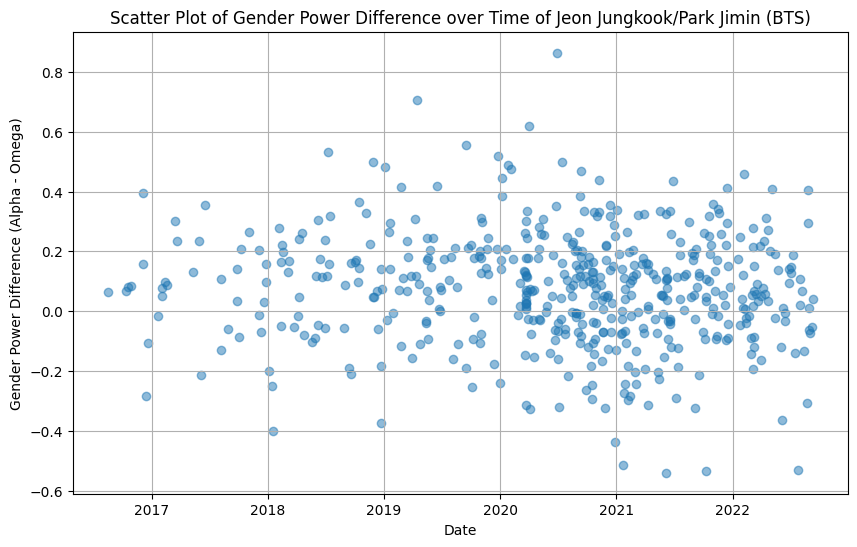

In [206]:
AO_JP_PJ['year'] = AO_JP_PJ['published'].dt.year
yearly_mean = AO_JP_PJ.groupby('year')['gender_power_difference'].mean().reset_index()

##scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(AO_JP_PJ['published'], AO_JP_PJ['gender_power_difference'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Gender Power Difference (Alpha - Omega)')
plt.title('Scatter Plot of Gender Power Difference over Time of Jeon Jungkook/Park Jimin (BTS)')
plt.grid(True)
plt.show()

In [207]:
AO_JP_PJ['gender_power_difference'].describe()

count    499.000000
mean       0.074532
std        0.188775
min       -0.539817
25%       -0.039824
50%        0.080069
75%        0.187264
max        0.863932
Name: gender_power_difference, dtype: float64

D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


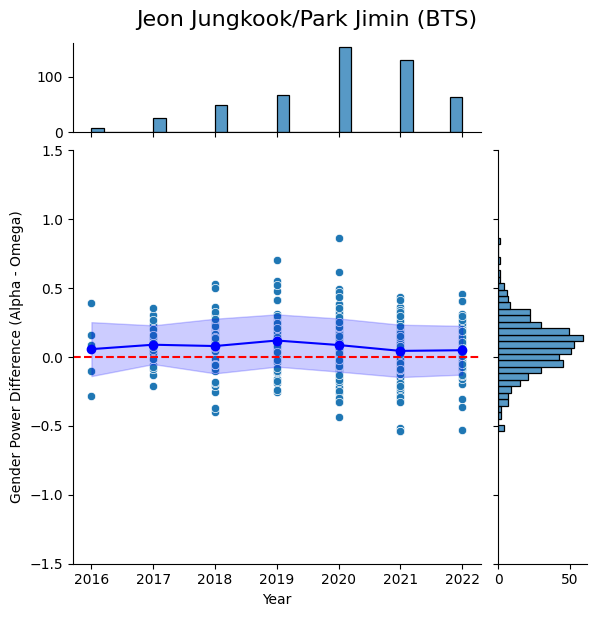

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

yearly_stats = AO_JP_PJ.groupby('year')['gender_power_difference'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'mean_gender_power_difference', 'std_gender_power_difference']

joint_plot = sns.jointplot(data=AO_JP_PJ, x='year', y='gender_power_difference', kind='scatter', marginal_kws=dict(bins=30, fill=True), height=6, ratio=4, marginal_ticks=True)

joint_plot.ax_joint.axhline(y=0, color='r', linestyle='--')

joint_plot.ax_joint.plot(yearly_stats['year'], yearly_stats['mean_gender_power_difference'], color='b', marker='o', label='Average Gender Power Difference')
joint_plot.ax_joint.fill_between(yearly_stats['year'], 
                 yearly_stats['mean_gender_power_difference'] - yearly_stats['std_gender_power_difference'], 
                 yearly_stats['mean_gender_power_difference'] + yearly_stats['std_gender_power_difference'], 
                 color='b', alpha=0.2)

joint_plot.set_axis_labels('Year', 'Gender Power Difference (Alpha - Omega)')

joint_plot.ax_joint.set_ylim(-1.5, 1.5)
plt.suptitle('Jeon Jungkook/Park Jimin (BTS)', y=1.02, fontsize=16)

plt.show()

In [229]:
AO_JP_PJ_merged = AO_JP_PJ.merge(df_JP_used_full[['story_id', 'author']], on='story_id', how='left')

unique_authors = AO_JP_PJ_merged['author'].nunique()

total_authors = AO_JP_PJ_merged['author'].count()

unique_author_ratio = unique_authors / total_authors

print(f"Unique Author Ratio: {unique_author_ratio:.2%}")

Unique Author Ratio: 74.55%


In [230]:
AO_JP_PJ_merged_1 = AO_JP_PJ_merged.merge(df_JP_used_full[['story_id', 'additional_tags']], on='story_id', how='left')
AO_JP_PJ_merged_1.drop(columns=['story_content'], inplace=True)
AO_JP_PJ_merged_1.head()

AO_JP_PJ_merged_1.to_csv(r"D:\Data\ABO_data\ABO_close_reading\AO_JP_PJ_merged_1.csv", index=False)


In [ ]:
##JK

In [231]:
import pandas as pd
df_JK_used_full_short = pd.read_json("D:/Data/ABO_riveter_result/df_JK_used_full_short_processed.json")
len(df_JK_used_full_short)

632

In [232]:
df_JK_used_full_short_01 = df_JK_used_full_short

Jeon_0_1_count = df_JK_used_full_short_01[df_JK_used_full_short_01['Jeon_power_score'].isin([0, 1, -1])].shape[0]

Kim_0_1_count = df_JK_used_full_short_01[df_JK_used_full_short_01['Kim_power_score'].isin([0, 1, -1])].shape[0]

print("Number of rows with Jeon_power_score equal to 0 or 1:", Jeon_0_1_count)
print("Number of rows with Kim_power_score equal to 0 or 1:", Kim_0_1_count)

Number of rows with Jeon_power_score equal to 0 or 1: 74
Number of rows with Kim_power_score equal to 0 or 1: 7


In [233]:
df_JK_used_full_short_01_cleaned = df_JK_used_full_short_01[
    ~((df_JK_used_full_short_01['Jeon_power_score'].isin([0, 1, -1])) | 
      (df_JK_used_full_short_01['Kim_power_score'].isin([0, 1, -1])))
]

df_JK_used_full_short_01_cleaned.reset_index(drop=True, inplace=True)

len(df_JK_used_full_short_01_cleaned)


556

In [234]:
df_JK_used_full_short_01_cleaned['Alpha Jungkook'] = 0
df_JK_used_full_short_01_cleaned['Beta Jungkook'] = 0
df_JK_used_full_short_01_cleaned['Omega Jungkook'] = 0
df_JK_used_full_short_01_cleaned['Alpha Taehyung'] = 0
df_JK_used_full_short_01_cleaned['Beta Taehyung'] = 0
df_JK_used_full_short_01_cleaned['Omega Taehyung'] = 0


alpha_jungkook_keywords = [x.lower() for x in ['Alpha Jungkook', 'Alpha!Jungkook', 'Alpha Jeon Jungkook', 'Alpha!Jeon Jungkook', 'Alpha Jungkook','Alpha Jeon Jungkook (BTS)','Top Jeon Jungkook','Top Jeon Jungkook (BTS)']]
beta_jungkook_keywords = [x.lower() for x in ['Beta Jungkook', 'Beta!Jungkook', 'Beta Jeon Jungkook', 'Beta!Jeon Jungkook', 'Beta Jungkook']]
omega_jungkook_keywords = [x.lower() for x in ['Omega Jungkook', 'Omega!Jungkook', 'Omega Jeon Jungkook', 'Omega!Jeon Jungkook', 'Omega Jungkook','Bottom Jeon Jungkook','Bottom Jeon Jungkook (BTS)']]
alpha_taehyung_keywords = [x.lower() for x in ['Alpha Taehyung', 'Alpha!Taehyung', 'Alpha Kim Taehyung | V', 'Alpha!Kim Taehyung | V', 'Alpha Kim Taehyung','Alpha Kim Taehyung | V (BTS)','Top Kim Taehyung | V','Top Kim Taehyung | V (BTS)']]
beta_taehyung_keywords = [x.lower() for x in ['Beta Taehyung', 'Beta!Taehyung', 'Beta Kim Taehyung | V', 'Beta!Kim Taehyung | V', 'Beta Kim Taehyung']]
omega_taehyung_keywords = [x.lower() for x in ['Omega Taehyung', 'Omega!Taehyung', 'Omega Kim Taehyung | V', 'Omega!Kim Taehyung | V', 'Omega Kim Taehyung','Bottom Kim Taehyung | V','Bottom Kim Taehyung | V (BTS)']]

for index, row in df_JK_used_full_short_01_cleaned.iterrows():
    genre_list = row['genre']  
    genre_string = ' '.join(genre_list).lower() 
    if any(keyword in genre_string for keyword in alpha_jungkook_keywords):
        df_JK_used_full_short_01_cleaned.at[index, 'Alpha Jungkook'] = 1
    if any(keyword in genre_string for keyword in beta_jungkook_keywords):
        df_JK_used_full_short_01_cleaned.at[index, 'Beta Jungkook'] = 1
    if any(keyword in genre_string for keyword in omega_jungkook_keywords):
        df_JK_used_full_short_01_cleaned.at[index, 'Omega Jungkook'] = 1
    if any(keyword in genre_string for keyword in alpha_taehyung_keywords):
        df_JK_used_full_short_01_cleaned.at[index, 'Alpha Taehyung'] = 1
    if any(keyword in genre_string for keyword in beta_taehyung_keywords):
        df_JK_used_full_short_01_cleaned.at[index, 'Beta Taehyung'] = 1
    if any(keyword in genre_string for keyword in omega_taehyung_keywords):
        df_JK_used_full_short_01_cleaned.at[index, 'Omega Taehyung'] = 1

selected_columns = [
    'story_id', 
    'genre', 
    'Alpha Jungkook', 
    'Beta Jungkook', 
    'Omega Jungkook', 
    'Alpha Taehyung', 
    'Beta Taehyung', 
    'Omega Taehyung'
]
df_checkABO_JK = df_JK_used_full_short_01_cleaned[selected_columns]

print(df_checkABO_JK.head())


   story_id                                              genre  \
0  10066646  [Alpha Min Yoongi | Suga, Alpha/Beta/Omega Dyn...   
1  10240829  [Alpha!Jungkook, Alpha/Beta/Omega Dynamics, M/...   
2  10391280  [Alpha!Jungkook, Alpha/Beta/Omega Dynamics, Al...   
3  10409064  [Age Difference, Alpha Kim Taehyung | V, Alpha...   
4  10630521  [Alpha/Beta/Omega Dynamics, Alternate Universe...   

   Alpha Jungkook  Beta Jungkook  Omega Jungkook  Alpha Taehyung  \
0               0              0               0               0   
1               1              0               0               0   
2               1              0               0               0   
3               0              0               1               1   
4               0              0               0               0   

   Beta Taehyung  Omega Taehyung  
0              0               0  
1              0               1  
2              0               1  
3              0               0  
4              0   

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\82325977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JK_used_full_short_01_cleaned['Alpha Jungkook'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\82325977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JK_used_full_short_01_cleaned['Beta Jungkook'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\82325977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [235]:
JT_id = df_JK_used_full_short_01_cleaned[(df_JK_used_full_short_01_cleaned['Alpha Jungkook'] == 1) & (df_JK_used_full_short_01_cleaned['Omega Taehyung'] == 1)]

df_JK_used_full_short_01_cleaned['JT'] = 0

df_JK_used_full_short_01_cleaned.loc[df_JK_used_full_short_01_cleaned['story_id'].isin(JT_id['story_id']), 'JT'] = 1

TJ_id = df_JK_used_full_short_01_cleaned[(df_JK_used_full_short_01_cleaned['Alpha Taehyung'] == 1) & (df_JK_used_full_short_01_cleaned['Omega Jungkook'] == 1)]

df_JK_used_full_short_01_cleaned['TJ'] = 0

df_JK_used_full_short_01_cleaned.loc[df_JK_used_full_short_01_cleaned['story_id'].isin(TJ_id['story_id']), 'TJ'] = 1

print(df_JK_used_full_short_01_cleaned.head())


   story_id                                         characters  \
0  10066646  [Jeon Jungkook, Jung Hoseok | J-Hope, Kim Namj...   
1  10240829  [Jeon Jungkook, Jung Hoseok | J-Hope, Kim Namj...   
2  10391280  [Cha Hakyeon | N, Jeon Jungkook, Jung Hoseok |...   
3  10409064  [Jeon Jungkook, Kim Seokjin | Jin, Kim Taehyun...   
4  10630521  [Jeon Jungkook, Jung Hoseok | J-Hope, Kim Namj...   

                                       relationships   published  \
0  Jeon Jungkook/Kim Taehyung | V, Kim Namjoon | ...  2017-03-03   
1  Jeon Jungkook/Kim Taehyung | V, Kim Namjoon | ...  2017-03-13   
2  Jeon Jungkook/Kim Taehyung | V, Kim Namjoon | ...  2017-03-21   
3                     Jeon Jungkook/Kim Taehyung | V  2017-03-22   
4  Jeon Jungkook/Kim Taehyung | V, Kim Namjoon | ...  2017-04-15   

                                               genre  \
0  [Alpha Min Yoongi | Suga, Alpha/Beta/Omega Dyn...   
1  [Alpha!Jungkook, Alpha/Beta/Omega Dynamics, M/...   
2  [Alpha!Jungkook, Alpha/

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3477279485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JK_used_full_short_01_cleaned['JT'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3477279485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JK_used_full_short_01_cleaned['TJ'] = 0


In [236]:
len(JT_id)

259

In [237]:
len(TJ_id)

137

In [240]:
AO_JT_TJ = df_JK_used_full_short_01_cleaned[(df_JK_used_full_short_01_cleaned['JT'] == 1) | (df_JK_used_full_short_01_cleaned['TJ'] == 1)]


AO_JT_TJ['gender_power_difference'] = 0


for index, row in AO_JT_TJ.iterrows():
    if row['JT'] == 1:
        AO_JT_TJ.at[index, 'gender_power_difference'] = row['Jeon_power_score'] - row['Kim_power_score']
    elif row['TJ'] == 1:
        AO_JT_TJ.at[index, 'gender_power_difference'] = row['Kim_power_score'] - row['Jeon_power_score']


AO_JT_TJ['published'] = pd.to_datetime(AO_JT_TJ['published'])

print(len(AO_JT_TJ))


392


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\1355150056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_JT_TJ['gender_power_difference'] = 0
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\1355150056.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.02598610550000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  AO_JT_TJ.at[index, 'gender_power_difference'] = row['Jeon_power_score'] - row['Kim_power_score']
C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\1355150056.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [241]:
AO_JT_TJ_01 = AO_JT_TJ

AO_JT_TJ_01.drop(columns=['story_content'], inplace=True)

AO_JT_TJ_01.to_csv(r"D:\Data\ABO_data\ABO_close_reading\AO_JT_TJ_01.csv", index=False)

C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\2528518589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_JT_TJ_01.drop(columns=['story_content'], inplace=True)


C:\Users\yang9\AppData\Local\Temp\ipykernel_25000\3426070277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO_JT_TJ['year'] = AO_JT_TJ['published'].dt.year


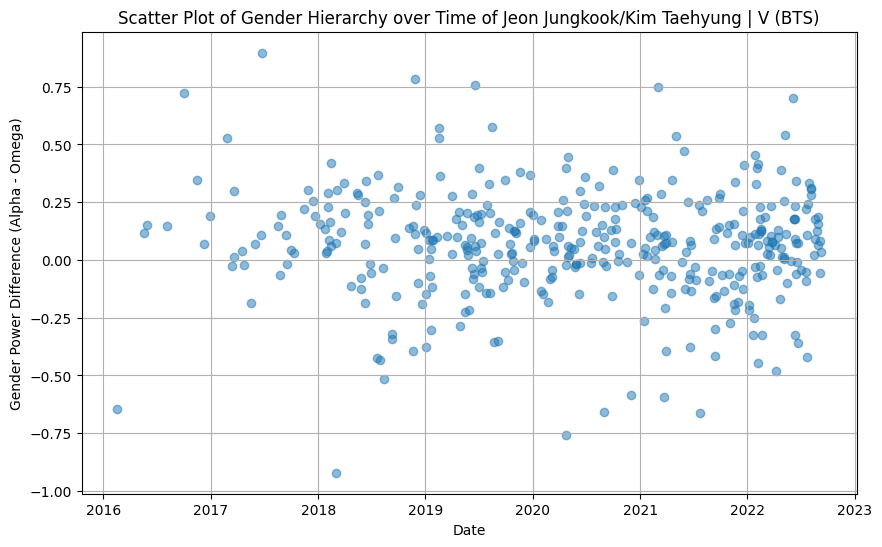

In [242]:
AO_JT_TJ['year'] = AO_JT_TJ['published'].dt.year
yearly_mean = AO_JT_TJ.groupby('year')['gender_power_difference'].mean().reset_index()
##scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(AO_JT_TJ['published'], AO_JT_TJ['gender_power_difference'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Gender Power Difference (Alpha - Omega)')
plt.title('Scatter Plot of Gender Hierarchy over Time of Jeon Jungkook/Kim Taehyung | V (BTS)')
plt.grid(True)
plt.show()

D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Program Files (x86)\python3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


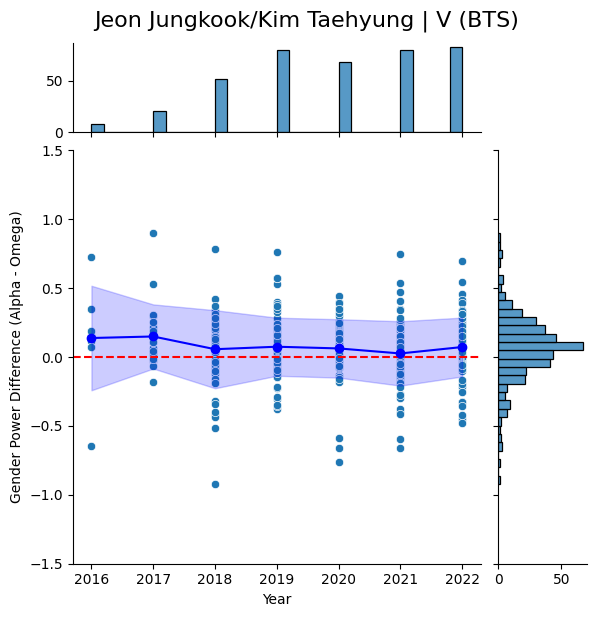

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

yearly_stats = AO_JT_TJ.groupby('year')['gender_power_difference'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'mean_gender_power_difference', 'std_gender_power_difference']

joint_plot = sns.jointplot(data=AO_JT_TJ, x='year', y='gender_power_difference', kind='scatter', marginal_kws=dict(bins=30, fill=True), height=6, ratio=4, marginal_ticks=True)


joint_plot.ax_joint.axhline(y=0, color='r', linestyle='--')

joint_plot.ax_joint.plot(yearly_stats['year'], yearly_stats['mean_gender_power_difference'], color='b', marker='o', label='Average Gender Power Difference')
joint_plot.ax_joint.fill_between(yearly_stats['year'], 
                 yearly_stats['mean_gender_power_difference'] - yearly_stats['std_gender_power_difference'], 
                 yearly_stats['mean_gender_power_difference'] + yearly_stats['std_gender_power_difference'], 
                 color='b', alpha=0.2)

joint_plot.set_axis_labels('Year', 'Gender Power Difference (Alpha - Omega)')
joint_plot.ax_joint.set_ylim(-1.5, 1.5)
plt.suptitle('Jeon Jungkook/Kim Taehyung | V (BTS)', y=1.02, fontsize=16)

plt.show()

In [244]:
df_JK_used_full = pd.read_json('D:/Data/ABO_data/ABO_JK_0520.json', lines=True)

AO_JT_TJ_merged = AO_JT_TJ.merge(df_JK_used_full[['story_id', 'author']], on='story_id', how='left')

unique_authors = AO_JT_TJ_merged['author'].nunique()

total_authors = AO_JT_TJ_merged['author'].count()

unique_author_ratio = unique_authors / total_authors

print(f"Unique Author Ratio: {unique_author_ratio:.2%}")

Unique Author Ratio: 77.30%


In [246]:
AO_JT_TJ_merged_1 = AO_JT_TJ_merged.merge(df_JK_used_full[['story_id', 'additional_tags']], on='story_id', how='left')
#AO_JT_TJ_merged_1.drop(columns=['story_content'], inplace=True)
AO_JT_TJ_merged_1.head()

AO_JT_TJ_merged_1.to_csv(r"D:\Data\ABO_data\ABO_close_reading\AO_JT_TJ_merged_1.csv", index=False)
